# EDAs das variáveis
 - Vamos estudar o comportamento com o TARGET das variáveis selecionadas, e as interações de algumas delas com outras variáveis

## 00. Pacotes

In [ ]:
import pandas as pd
import numpy as np
import funcoes_basicas as funcs
import funcoes_derivadas as funcs_deriv
import random
import gc

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve

from lightgbm import LGBMClassifier
import lightgbm as lgb

# Filter out the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning

from datetime import date, datetime
from tqdm import tqdm
from scipy.stats import ks_2samp

import xgboost as xgb
import optuna
import pickle
import shap

from joblib import dump, load

def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y == 1], y_pred[y != 1]).statistic

ks_score = make_scorer(ks_stat)

# Definindo a semente
random.seed(123)

import warnings
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 01. Baixa Pacotes

In [ ]:
# Baixando os dados de treino, as variáveir forem salavas em ordem de IV
df_treino = pd.read_parquet(r'D:\projeto_modelo_credito\dados\df_treino_processado.parquet',
                                 engine='pyarrow')
df_treino.head()

SK_ID_CURR  TARGET_publico  num__EXT_SOURCE_3_publico  \
0      100010               0                   0.540654   
1      100263               0                   0.270707   
2      100320               0                -999.000000   
3      100704               0                   0.621226   
4      100768               0                   0.556727   

   num__EXT_SOURCE_2_publico  num__EXT_SOURCE_1_publico  \
0                   0.714279                -999.000000   
1                   0.235314                   0.770814   
2                   0.610447                -999.000000   
3                   0.398296                   0.676170   
4                   0.639849                   0.722559   

   num__PAYMENT_RATE_publico  num__AMT_GOODS_PRICE_publico  \
0                       0.03                     1530000.0   
1                       0.06                      585000.0   
2                       0.10                      463500.0   
3                       0.03                      760500.0   
4                       0.04                      229500.0   

   num__DAYS_EMPLOYED_publico  num__DAYS_BIRTH_publico  \
0                      -449.0                 -18850.0   
1                    365243.0                 -23456.0   
2                     -2907.0                 -11996.0   
3                     -7042.0                 -17781.0   
4                     -2271.0                 -20438.0   

   num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo  \
0                                             -999.0                 
1                                           133240.5                 
2                                             -999.0                 
3                                            29682.0                 
4                                             -999.0                 

   num__CREDIT_TO_GOODS_RATIO_publico  num__INCOME_TO_EMPLOYED_RATIO_publico  \
0                                1.00                            -801.780029   
1                                1.00                               0.300000   
2                                1.04                             -77.400002   
3                                1.00                             -12.780000   
4                                1.21                             -49.540001   

   num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo  \
0                                            -999.00                 
1                                          133240.50                 
2                                            -999.00                 
3                                          524198.25                 
4                                            -999.00                 

   num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo  \
0                                             -999.0                
1                                              -21.0                
2                                              -15.0                
3                                               -6.0                
4                                             -999.0                

   num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo  \
0                                             -999.0               
1                                              -21.0               
2                                             -999.0               
3                                              -49.0               
4                                             -999.0               

   num__REGION_RATING_CLIENT_W_CITY_publico  \
0                                       3.0   
1                                       2.0   
2                                       2.0   
3                                       2.0   
4                                       2.0   

   num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS_36_MESES_externo  \
0                                             -999.0             

In [ ]:
df_treino.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 43 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   SK_ID_CURR                                                          147480 non-null  int32  
 1   TARGET_publico                                                      147480 non-null  int32  
 2   num__EXT_SOURCE_3_publico                                           147480 non-null  float32
 3   num__EXT_SOURCE_2_publico                                           147480 non-null  float32
 4   num__EXT_SOURCE_1_publico                                           147480 non-null  float32
 5   num__PAYMENT_RATE_publico                                           147480 non-null  float32
 6   num__AMT_GOODS_PRICE_publico                                        147480 non-null  float32
 7   nu

In [ ]:
# remoneando o noome da Target
df_treino.rename(columns = {'TARGET_publico': 'TARGET'}, inplace=True)

In [ ]:
df_treino.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico',
 'num__PAYMENT_RATE_publico',
 'num__AMT_GOODS_PRICE_publico',
 'num__DAYS_EMPLOYED_publico',
 'num__DAYS_BIRTH_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo',
 'num__CREDIT_TO_GOODS_RATIO_publico',
 'num__INCOME_TO_EMPLOYED_RATIO_publico',
 'num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo',
 'num__REGION_RATING_CLIENT_W_CITY_publico',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS_36_MESES_externo',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo',
 'cat__NAME_EDUCATION_TYPE_publico_Higher_education',
 'num__DAYS_LAST_PHONE_CHANGE_publico',
 'cat__NAME_INCOME_TYPE_publico_Working',
 'num__VL_TOT_VL_TOT_AM

In [ ]:
lista_vars = [
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico',
 'num__PAYMENT_RATE_publico',
 'num__AMT_GOODS_PRICE_publico',
 'num__DAYS_EMPLOYED_publico',
 'num__DAYS_BIRTH_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo',
 'num__CREDIT_TO_GOODS_RATIO_publico',
 'num__INCOME_TO_EMPLOYED_RATIO_publico',
 'num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo',
 'num__REGION_RATING_CLIENT_W_CITY_publico',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS_36_MESES_externo',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo',
 'cat__NAME_EDUCATION_TYPE_publico_Higher_education',
 'num__DAYS_LAST_PHONE_CHANGE_publico',
 'cat__NAME_INCOME_TYPE_publico_Working',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_12_MESES_externo',
 'num__TOTALAREA_MODE_publico',
 'num__REGION_POPULATION_RELATIVE_publico',
 'num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo',
 'num__DAYS_ID_PUBLISH_publico',
 'num__CAR_TO_EMPLOYED_RATIO_publico',
 'num__REG_CITY_NOT_WORK_CITY_publico',
 'num__FLAG_DOCUMENT_3_publico',
 'num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__DAYS_REGISTRATION_publico',
 'cat__OCCUPATION_TYPE_publico_Laborers',
 'num__INCOME_TO_BIRTH_RATIO_publico',
 'num__LIVINGAPARTMENTS_MEDI_publico',
 'num__VL_TOT_VL_TOT_AMT_ANNUITY_ULTIMOS_24_MESES_externo',
 'num__DEF_30_CNT_SOCIAL_CIRCLE_publico',
 'cat__WALLSMATERIAL_MODE_publico_Panel',
 'num__VL_MIN_QTD_STATUS_C_ULTIMOS_36_MESES_externo',
 'num__QT_MAX_QT_MAX_CREDIT_DAY_OVERDUE_ULTIMOS_36_MESES_externo',
 'cat__NAME_CONTRACT_TYPE_publico_Cash_loans',
 'num__FLAG_DOCUMENT_6_publico',
 'num__FLAG_WORK_PHONE_publico']

In [ ]:
## Calcula a univariada das variáveis já considerando a imputação de missing = -999

univariada_v2 = funcs.univariada_numerica_v2(df_treino,lista_vars)
univariada_v2

var  tamanho df  \
0                           num__EXT_SOURCE_3_publico      147480   
1                           num__EXT_SOURCE_2_publico      147480   
2                           num__EXT_SOURCE_1_publico      147480   
3                           num__PAYMENT_RATE_publico      147480   
4                        num__AMT_GOODS_PRICE_publico      147480   
5                          num__DAYS_EMPLOYED_publico      147480   
6                             num__DAYS_BIRTH_publico      147480   
7   num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS...      147480   
8                  num__CREDIT_TO_GOODS_RATIO_publico      147480   
9               num__INCOME_TO_EMPLOYED_RATIO_publico      147480   
10  num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS...      147480   
11  num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_...      147480   
12  num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_...      147480   
13           num__REGION_RATING_CLIENT_W_CITY_publico      147480   
14  num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS...      147480   
15  num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMO...      147480   
16  num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTI...      147480   
17  cat__NAME_EDUCATION_TYPE_publico_Higher_education      147480   
18                num__DAYS_LAST_PHONE_CHANGE_publico      147480   
19              cat__NAME_INCOME_TYPE_publico_Working      147480   
20  num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTI...      147480   
21                        num__TOTALAREA_MODE_publico      147480   
22            num__REGION_POPULATION_RELATIVE_publico      147480   
23  num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_M...      147480   
24                       num__DAYS_ID_PUBLISH_publico      147480   
25                 num__CAR_TO_EMPLOYED_RATIO_publico      147480   
26                num__REG_CITY_NOT_WORK_CITY_publico      147480   
27                       num__FLAG_DOCUMENT_3_publico      147480   
28  num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_...      147480   
29                     num__DAYS_REGISTRATION_publico      147480   
30              cat__OCCUPATION_TYPE_publico_Laborers      147480   
31                 num__INCOME_TO_BIRTH_RATIO_publico      147480   
32                 num__LIVINGAPARTMENTS_MEDI_publico      147480   
33  num__VL_TOT_VL_TOT_AMT_ANNUITY_ULTIMOS_24_MESE...      147480   
34              num__DEF_30_CNT_SOCIAL_CIRCLE_publico      147480   
35              cat__WALLSMATERIAL_MODE_publico_Panel      147480   
36  num__VL_MIN_QTD_STATUS_C_ULTIMOS_36_MESES_externo      147480   
37  num__QT_MAX_QT_MAX_CREDIT_DAY_OVERDUE_ULTIMOS_...      147480   
38         cat__NAME_CONTRACT_TYPE_publico_Cash_loans      147480   
39                       num__FLAG_DOCUMENT_6_publico      147480   
40                       num__FLAG_WORK_PHONE_publico      147480   

    tamanho var  % missing           mean           std           min  \
0        137193   0.069752       0.510113  1.943882e-01  5.272652e-04   
1        147178   0.002048       0.517019  1.896821e-01  1.315956e-06   
2         65562   0.555452       0.506506  2.095315e-01  1.456813e-02   
3        147473   0.000047       0.053322  2.256534e-02  2.000000e-02   
4        147343   0.000929  545441.426583  3.718907e+05  4.050000e+04   
5        147436   0.000298   62922.709759  1.406001e+05 -1.791200e+04   
6        147480   0.000000  -16097.225515  4.304826e+03 -2.520100e+04   
7         77801   0.472464  524694.706119  1.254140e+06 -6.795000e+04   
8        147343   0.000929       1.123514  1.241931e-01  1.500000e-01   
9        147479   0.000007    -174.162832  5.339248e+02 -1.260000e+05   
10       110464   0.250990  296151.808856  8.342882e+05 -2.089184e+06   
11       116872   0.207540     -52.584828  2.002371e+02 -4.191900e+04   
12        47021   0.681170     -22.496034  2.106319e+01 -1.800000e+02   
13       147480   0.000000       2.034344  4.991809e-01  1.000000e+00   
14       127711   0.134045    4009.986924  8.685475e+03 

In [ ]:
#univariada_v2.to_excel('univariada_41_vars_sel.xlsx')

In [ ]:
# criando a variável anomes como 202504
df_treino['anomes'] = 202504


📊 Variável: num__EXT_SOURCE_3_publico


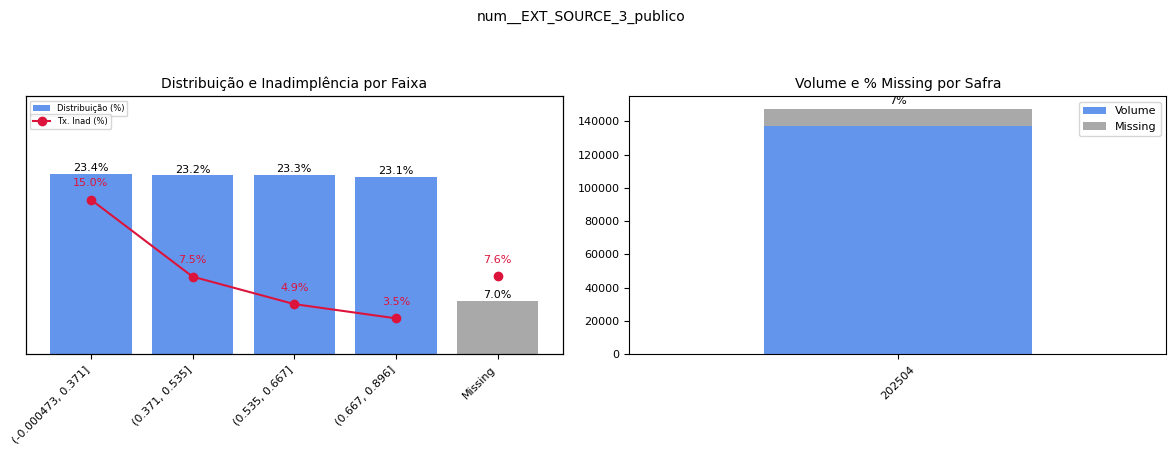


📊 Variável: num__EXT_SOURCE_2_publico


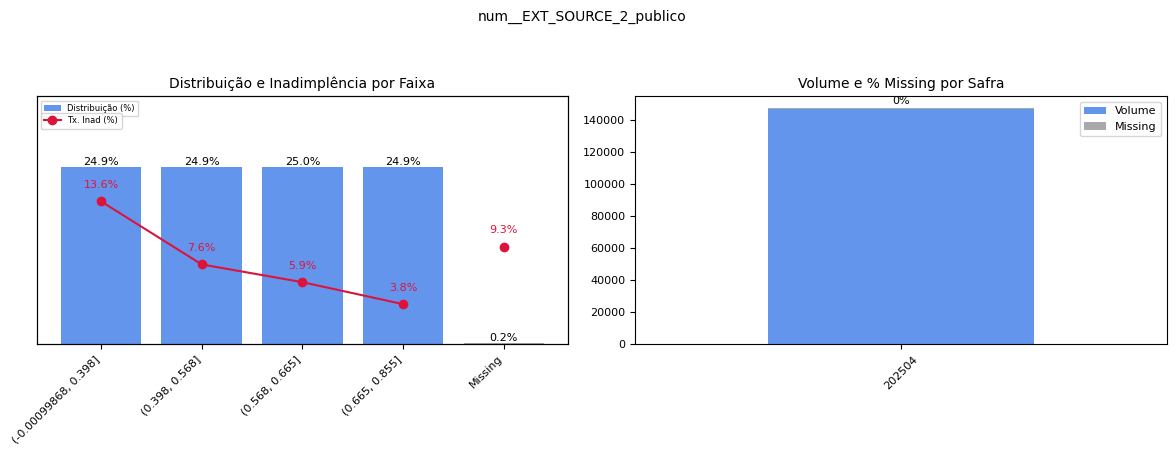


📊 Variável: num__EXT_SOURCE_1_publico


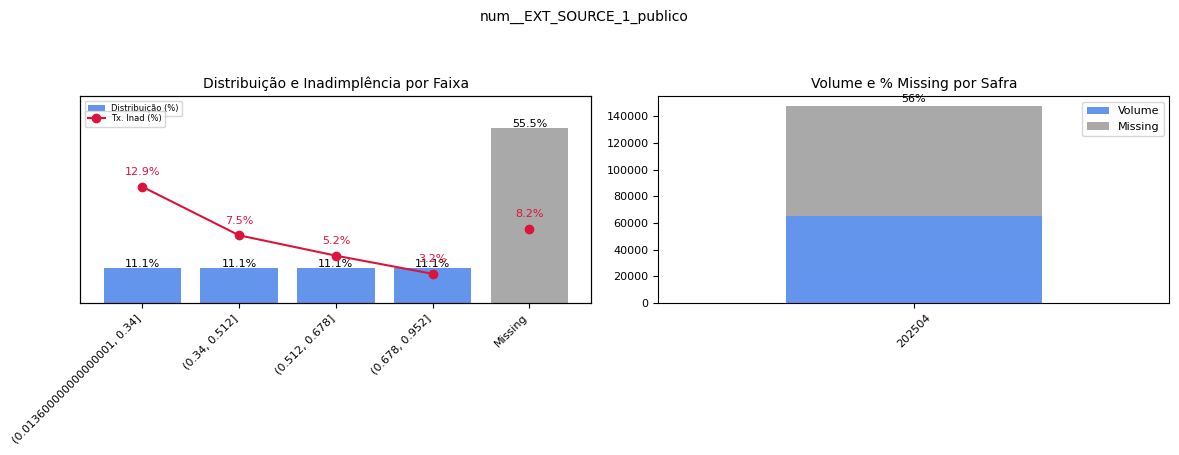


📊 Variável: num__PAYMENT_RATE_publico


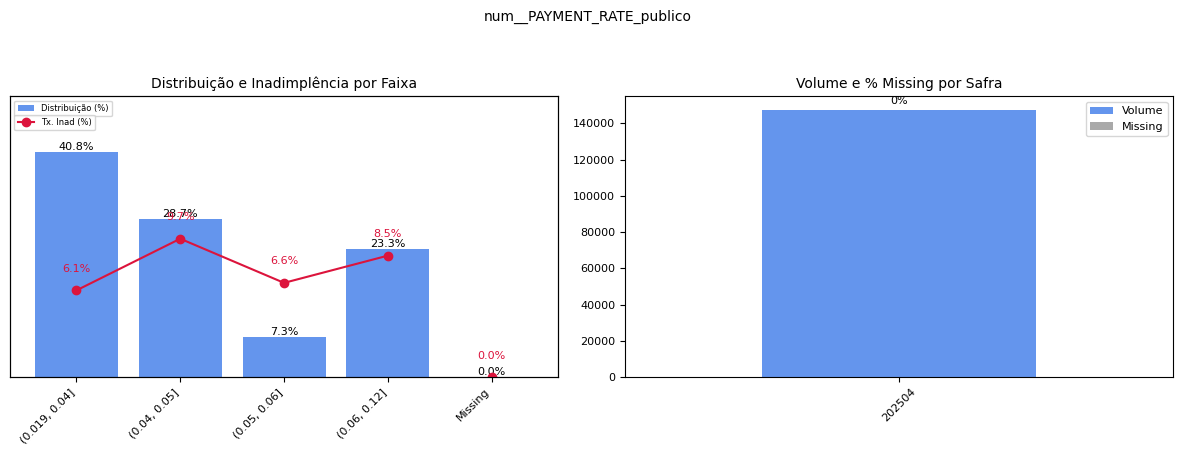


📊 Variável: num__AMT_GOODS_PRICE_publico


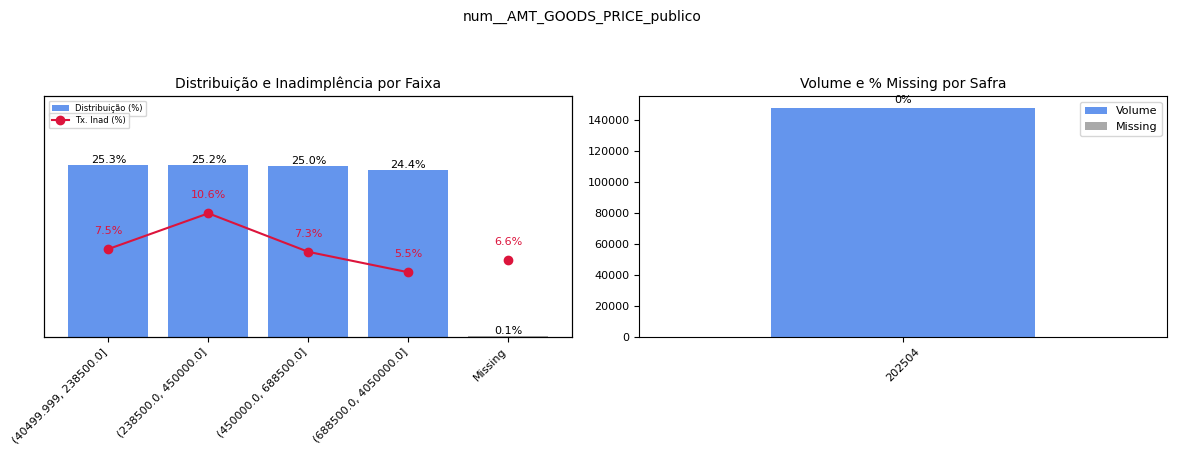


📊 Variável: num__DAYS_EMPLOYED_publico


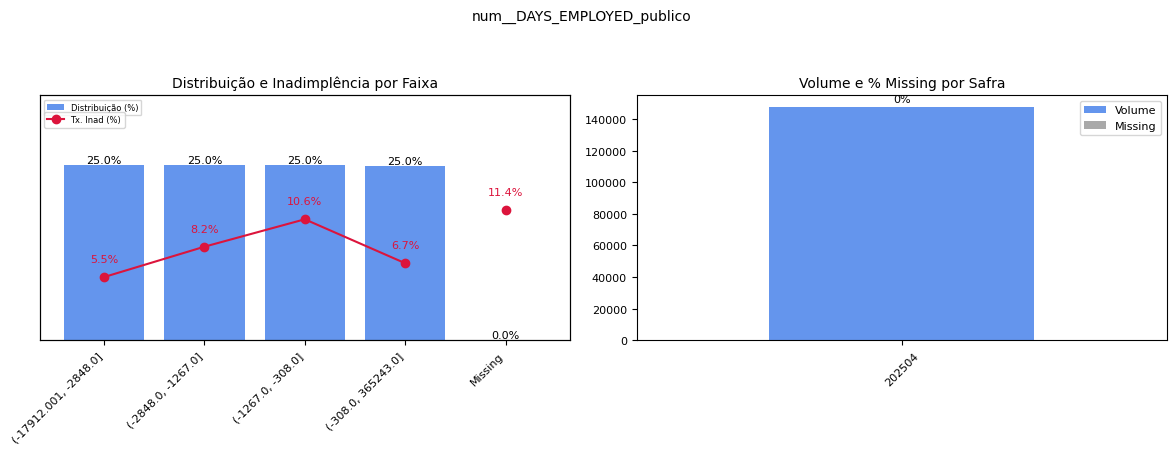


📊 Variável: num__DAYS_BIRTH_publico


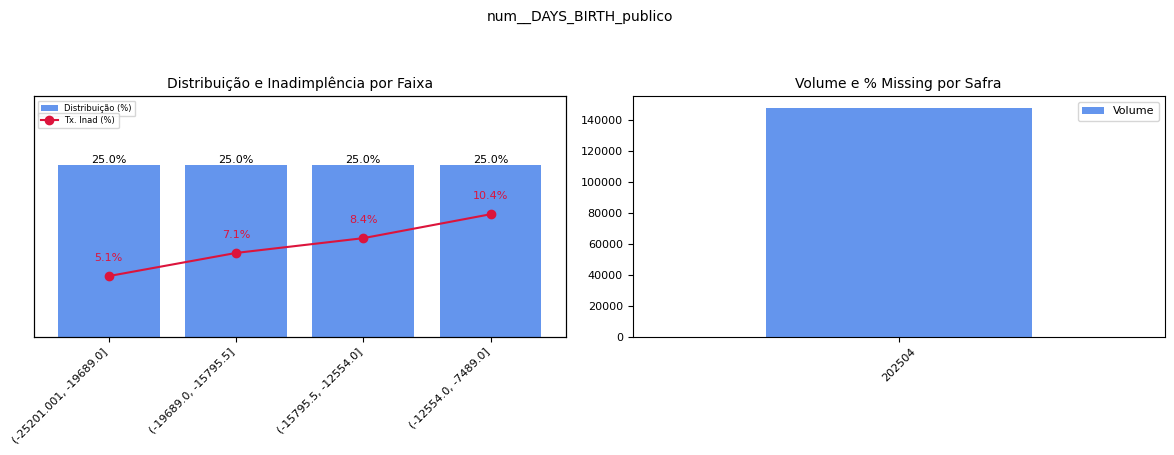


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo


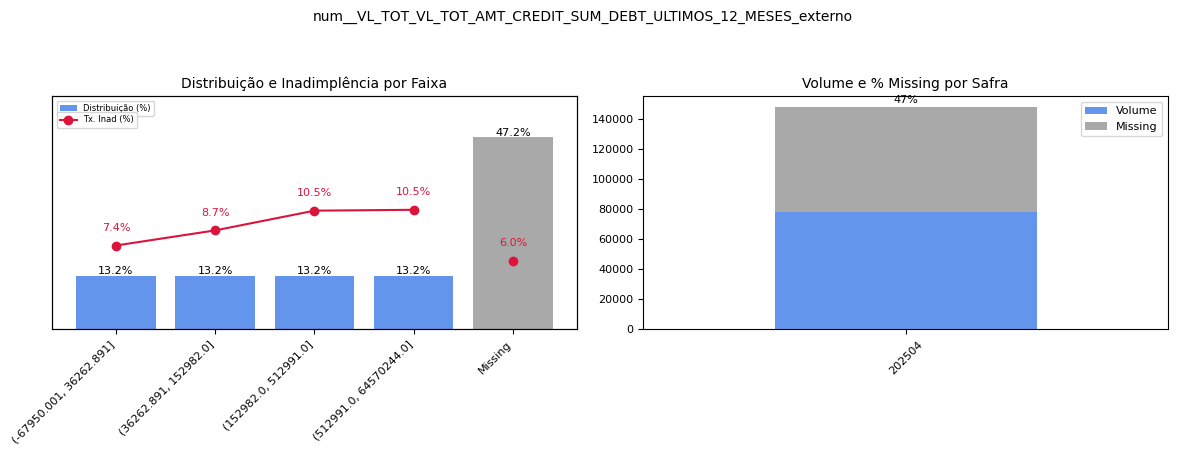


📊 Variável: num__CREDIT_TO_GOODS_RATIO_publico


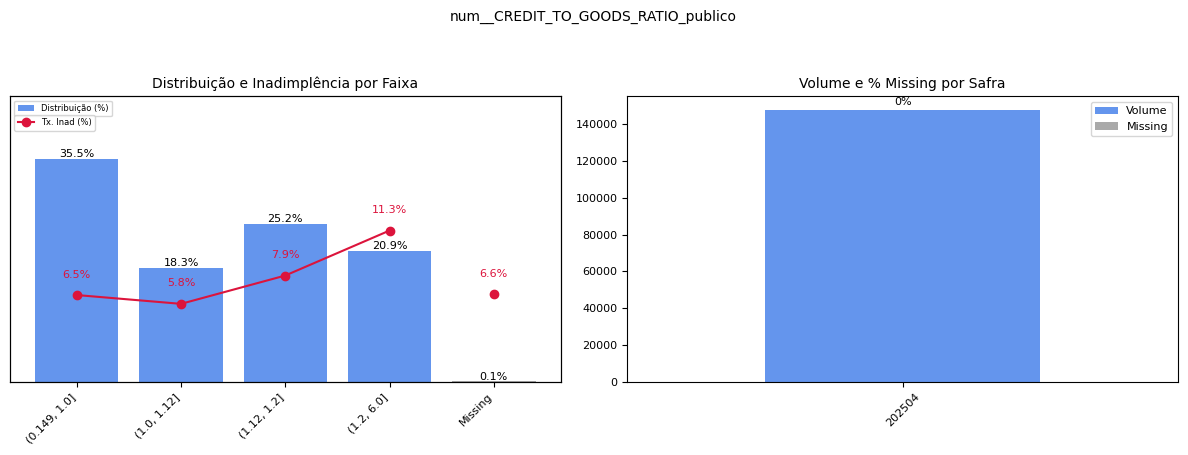


📊 Variável: num__INCOME_TO_EMPLOYED_RATIO_publico


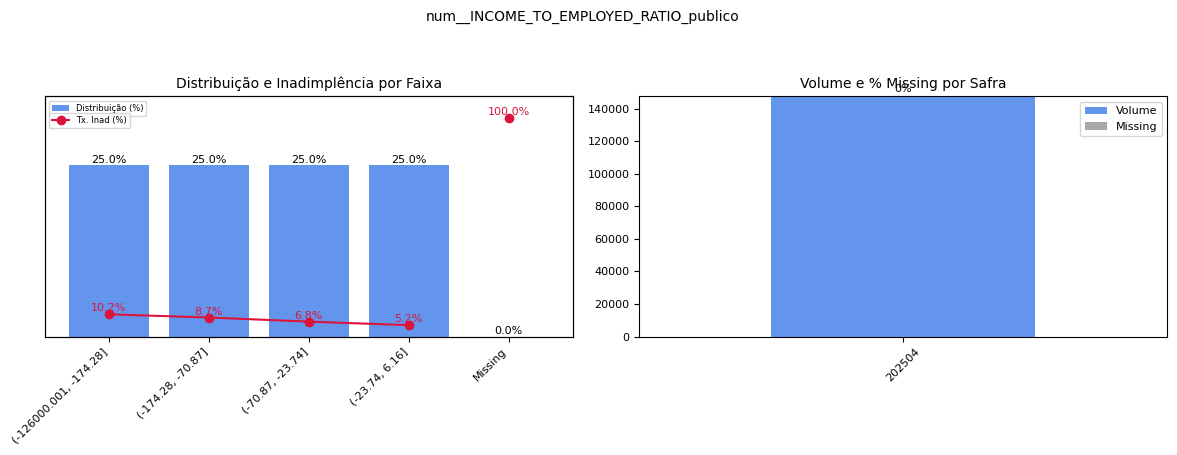


📊 Variável: num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo


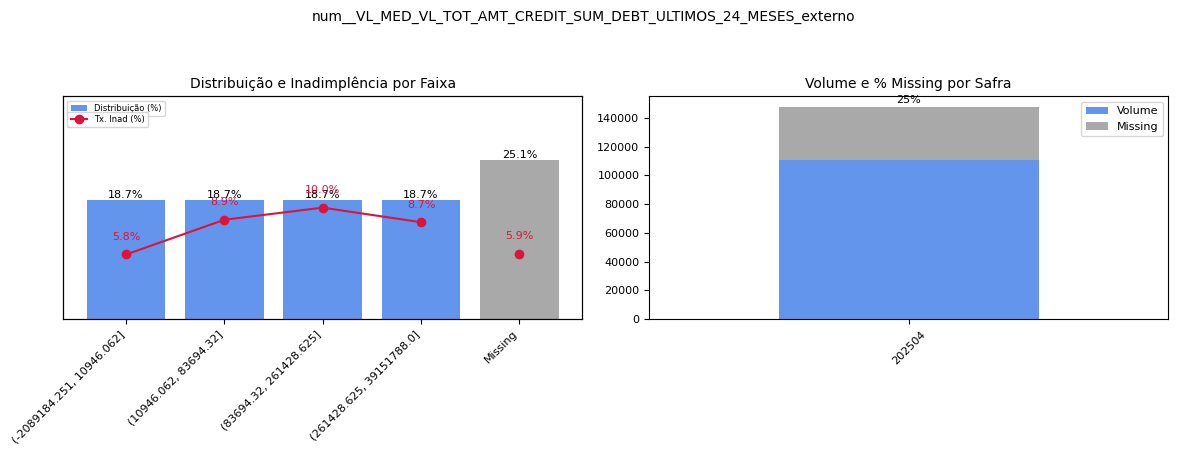


📊 Variável: num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo


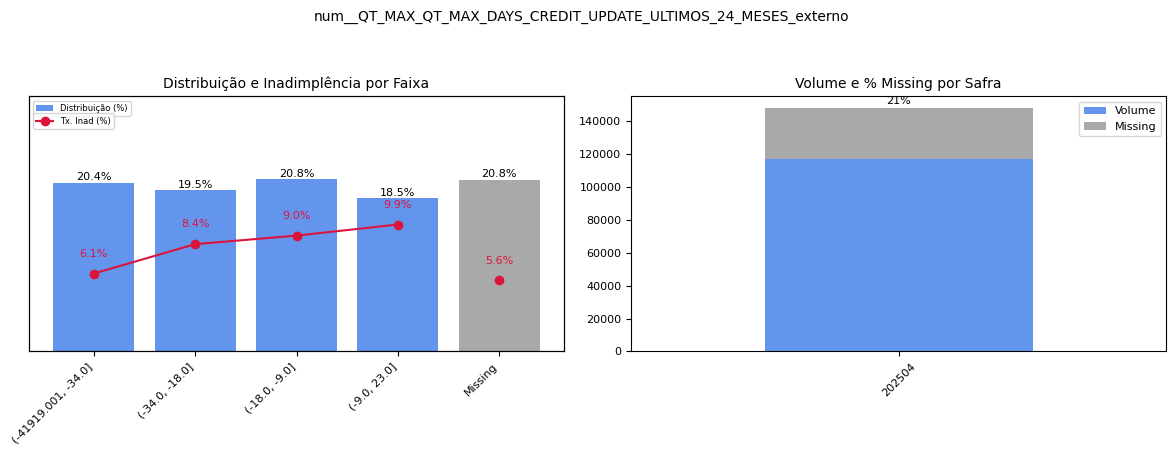


📊 Variável: num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo


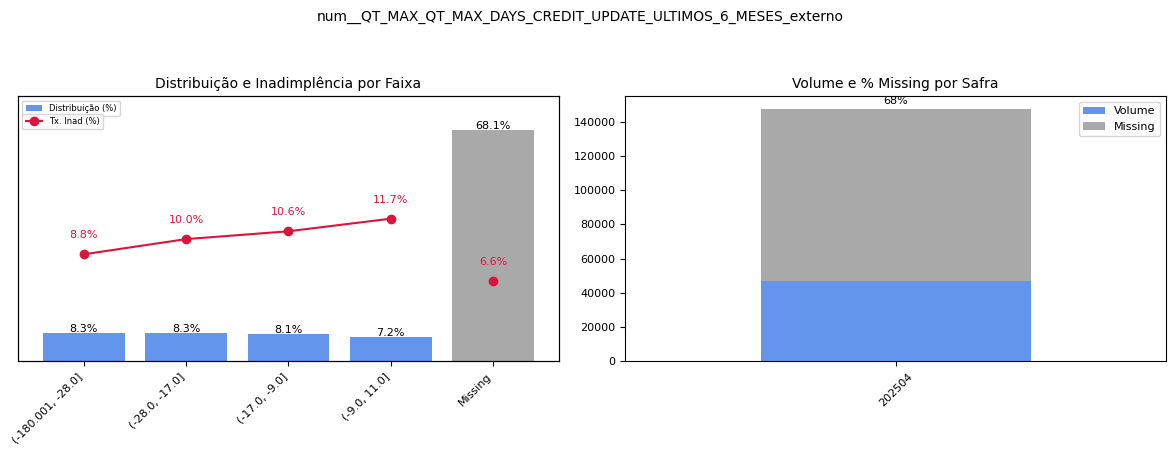


📊 Variável: num__REGION_RATING_CLIENT_W_CITY_publico


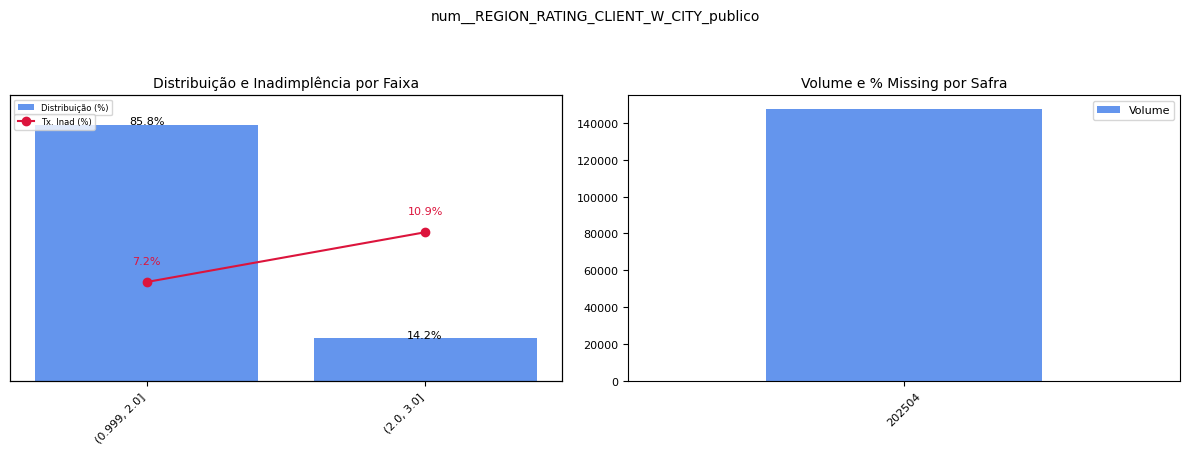


📊 Variável: num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS_36_MESES_externo


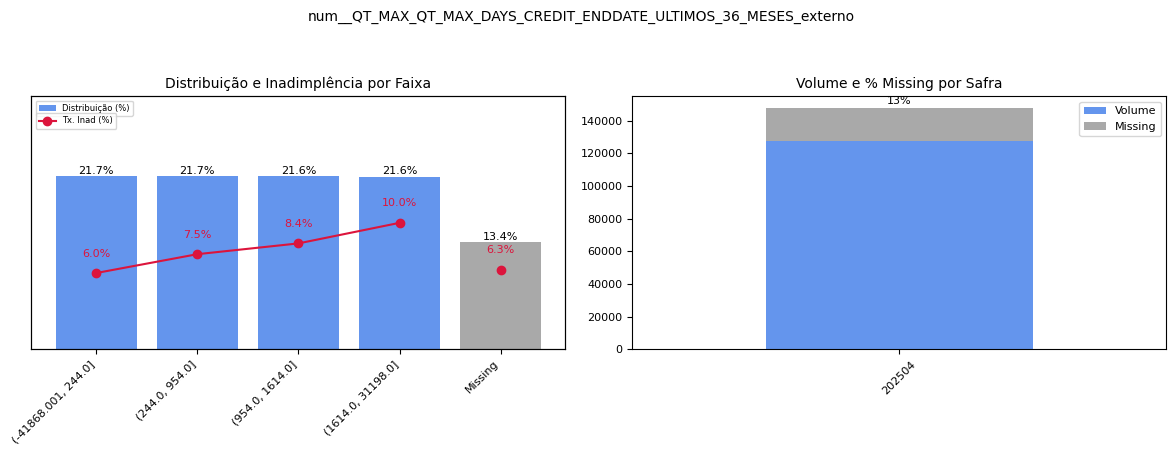


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo


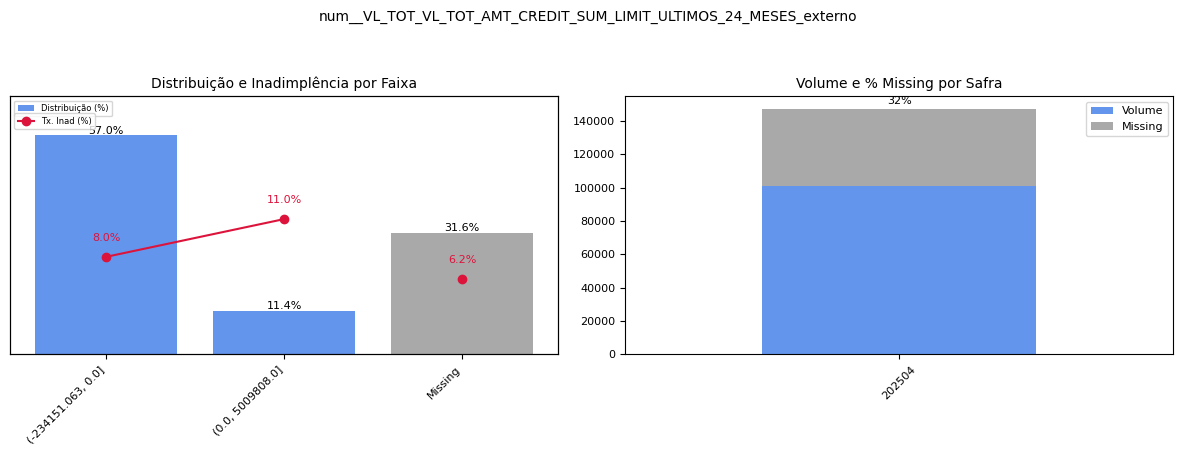


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo


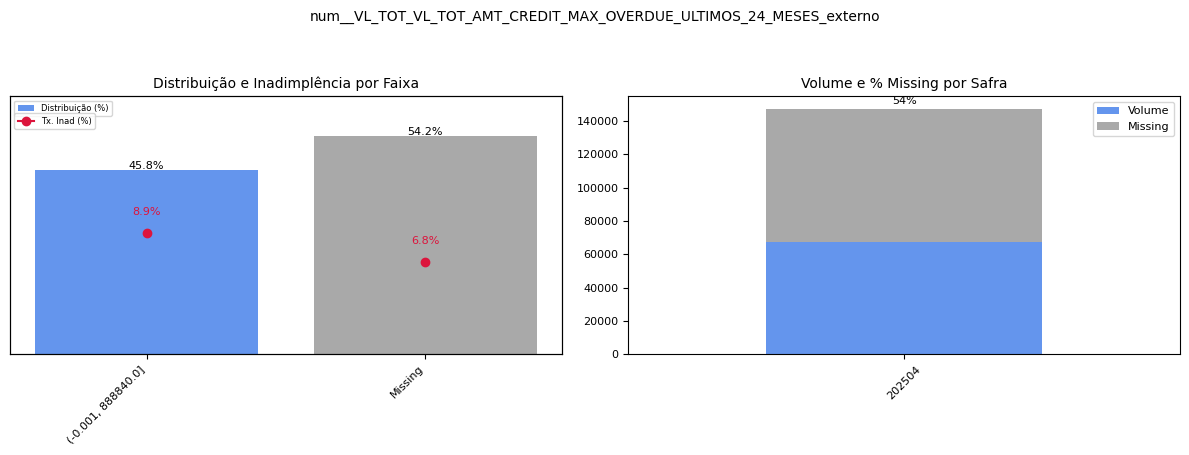


📊 Variável: cat__NAME_EDUCATION_TYPE_publico_Higher_education


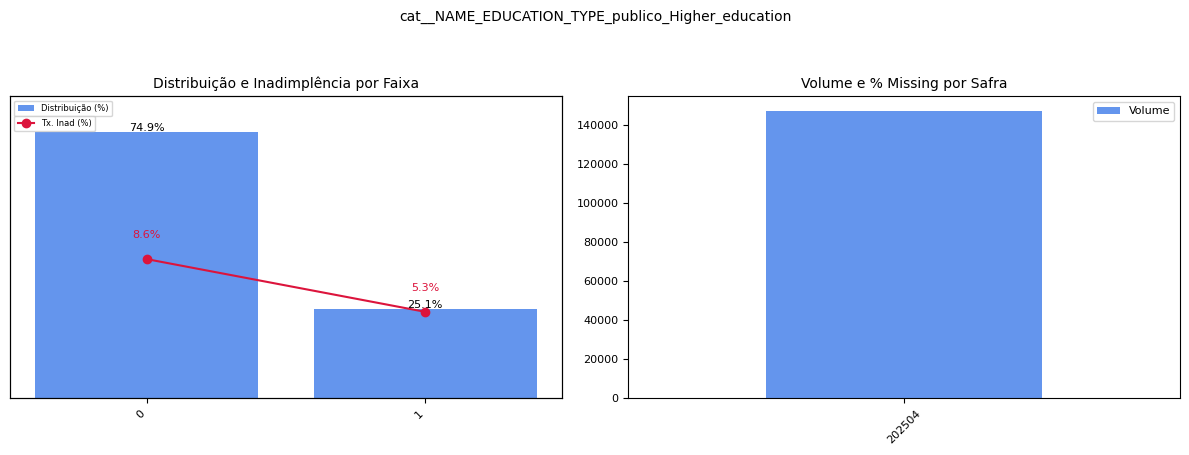


📊 Variável: num__DAYS_LAST_PHONE_CHANGE_publico


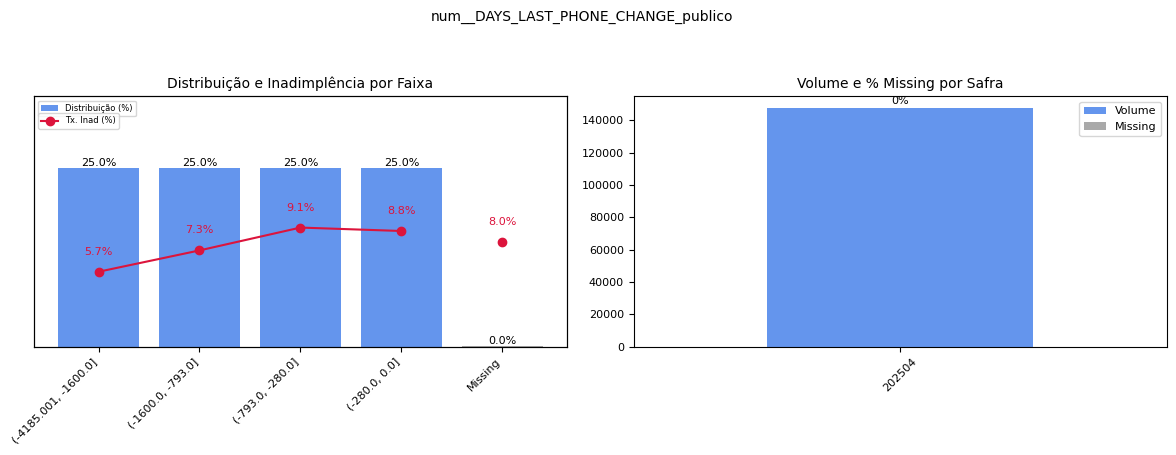


📊 Variável: cat__NAME_INCOME_TYPE_publico_Working


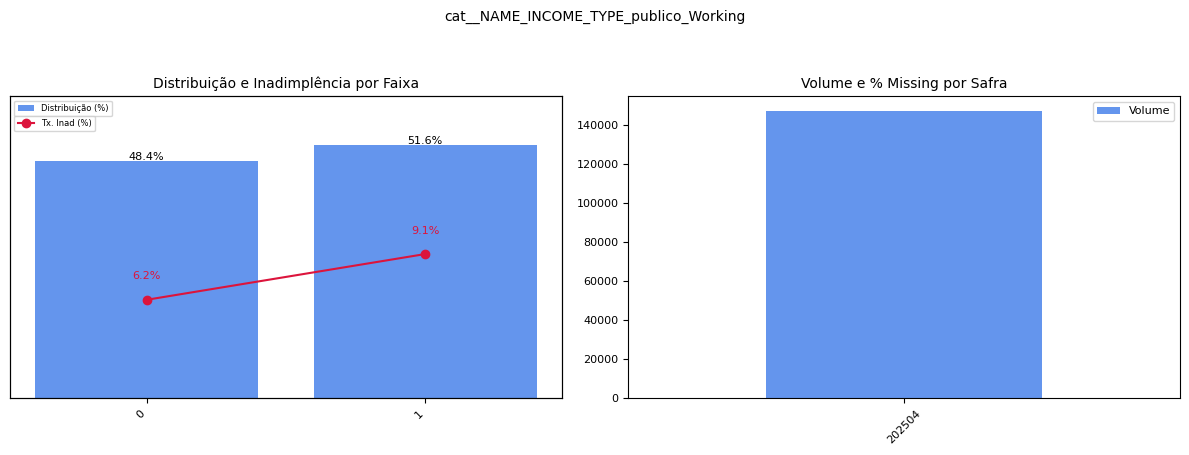


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_12_MESES_externo


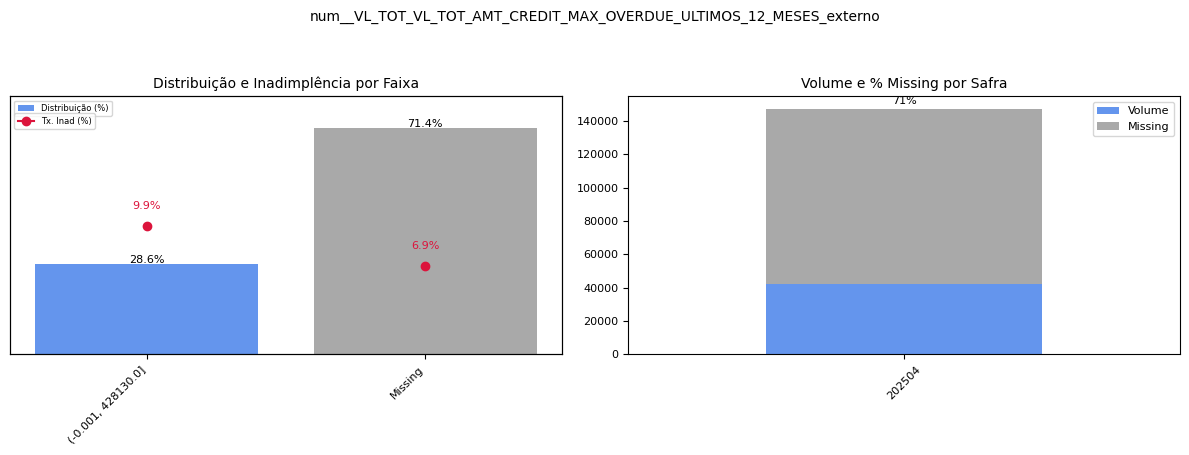


📊 Variável: num__TOTALAREA_MODE_publico


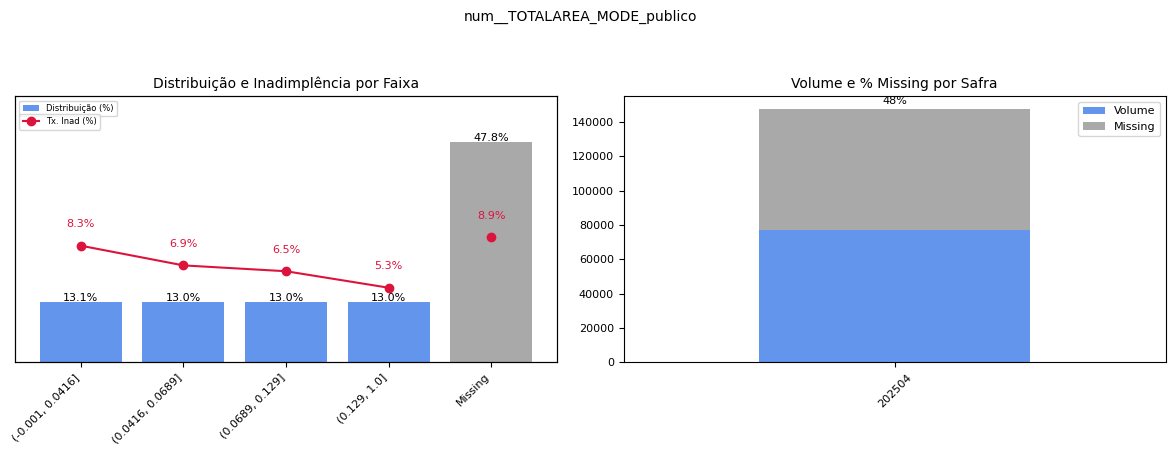


📊 Variável: num__REGION_POPULATION_RELATIVE_publico


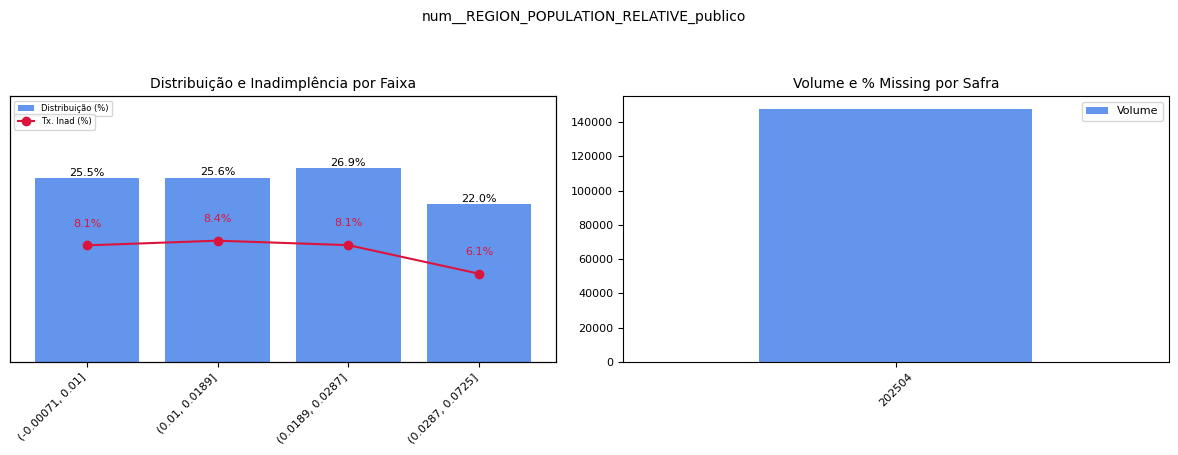


📊 Variável: num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo


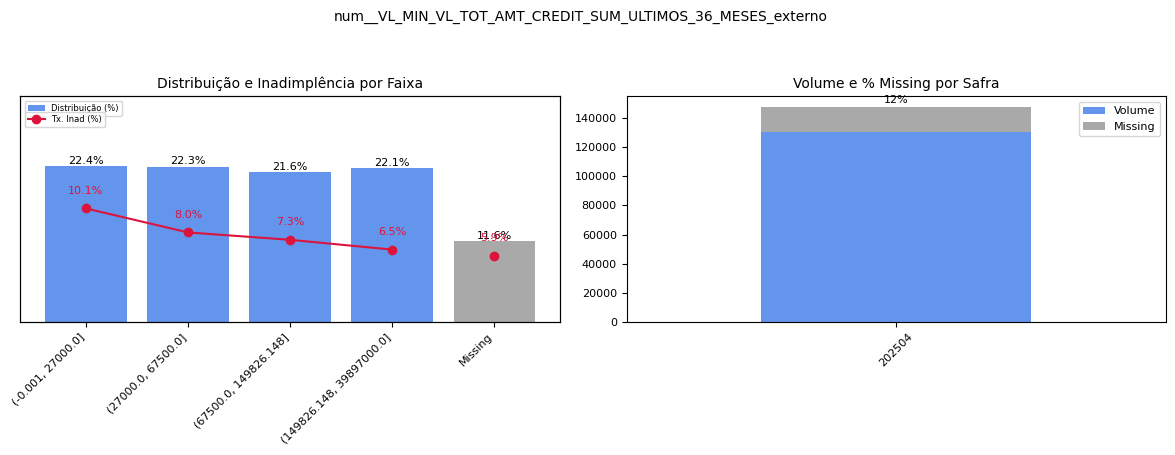


📊 Variável: num__DAYS_ID_PUBLISH_publico


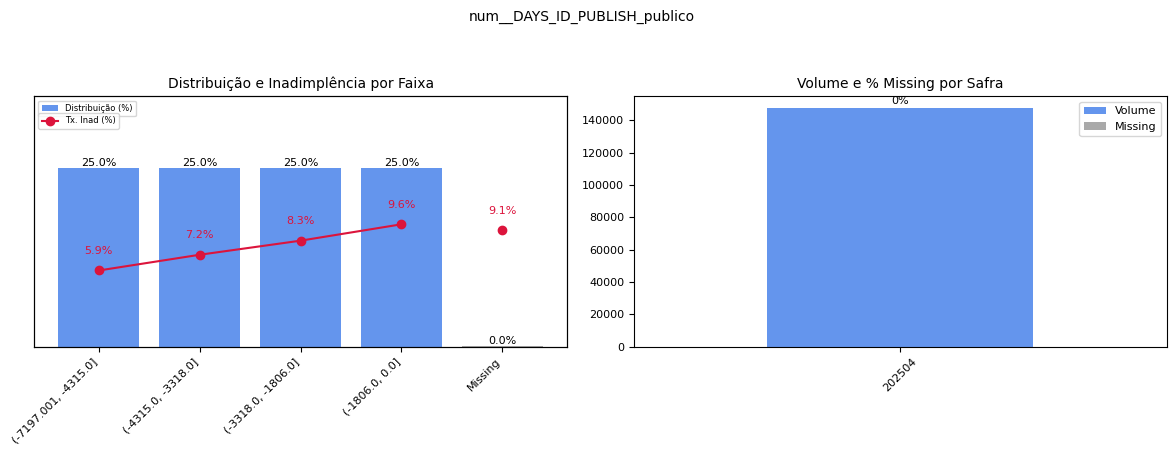


📊 Variável: num__CAR_TO_EMPLOYED_RATIO_publico


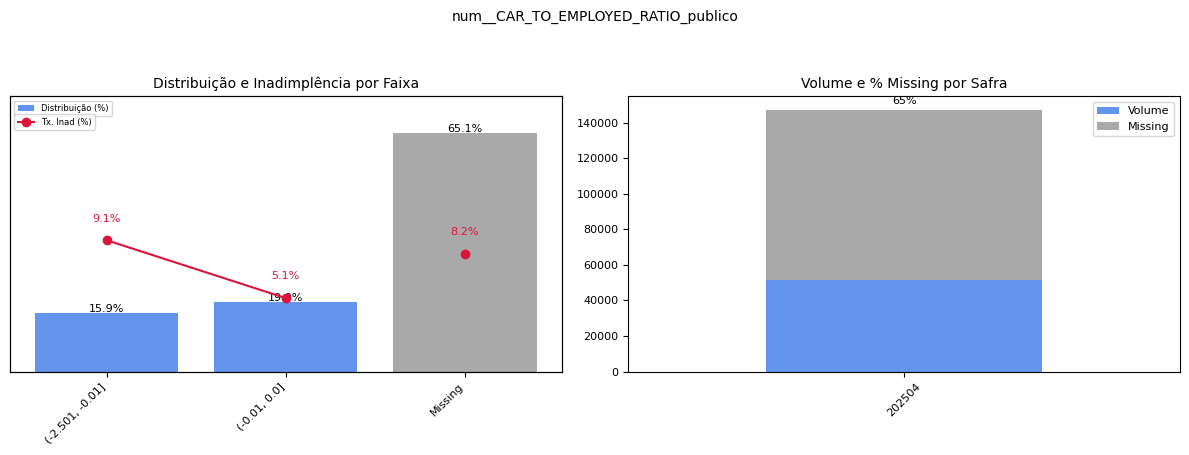


📊 Variável: num__REG_CITY_NOT_WORK_CITY_publico


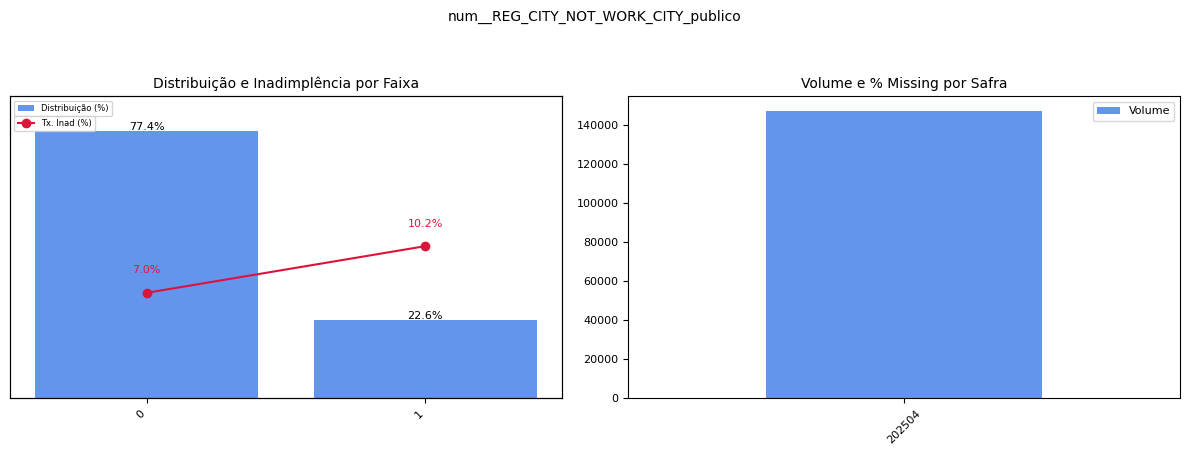


📊 Variável: num__FLAG_DOCUMENT_3_publico


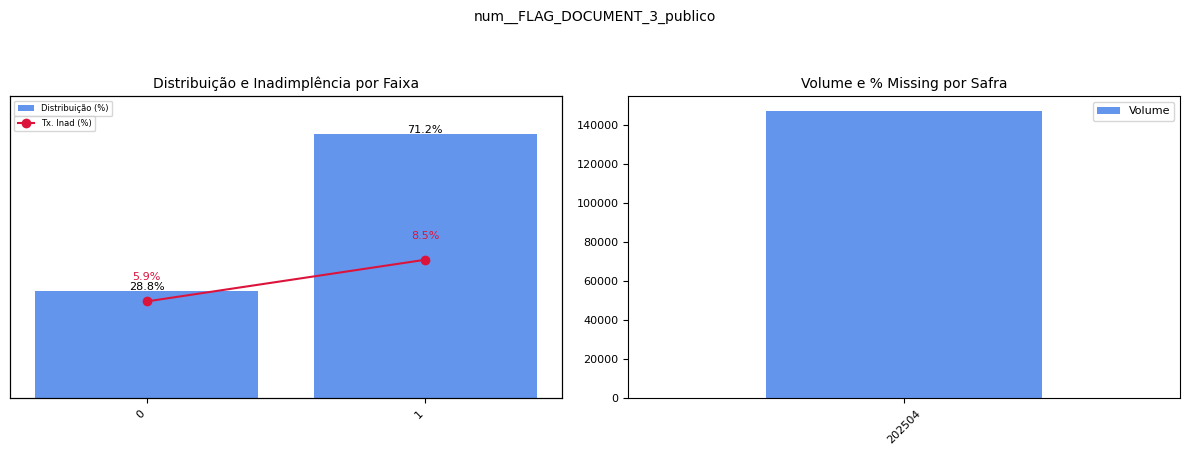


📊 Variável: num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo


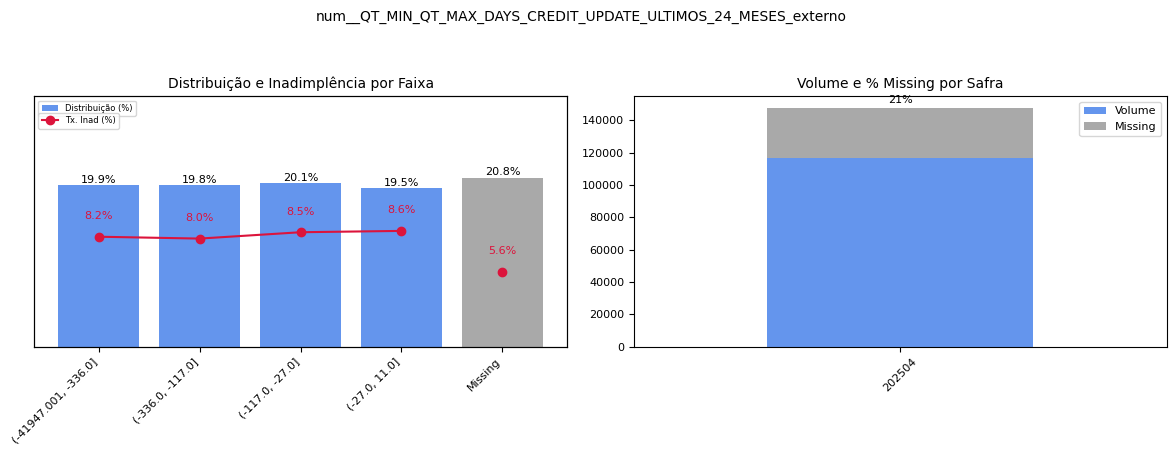


📊 Variável: num__DAYS_REGISTRATION_publico


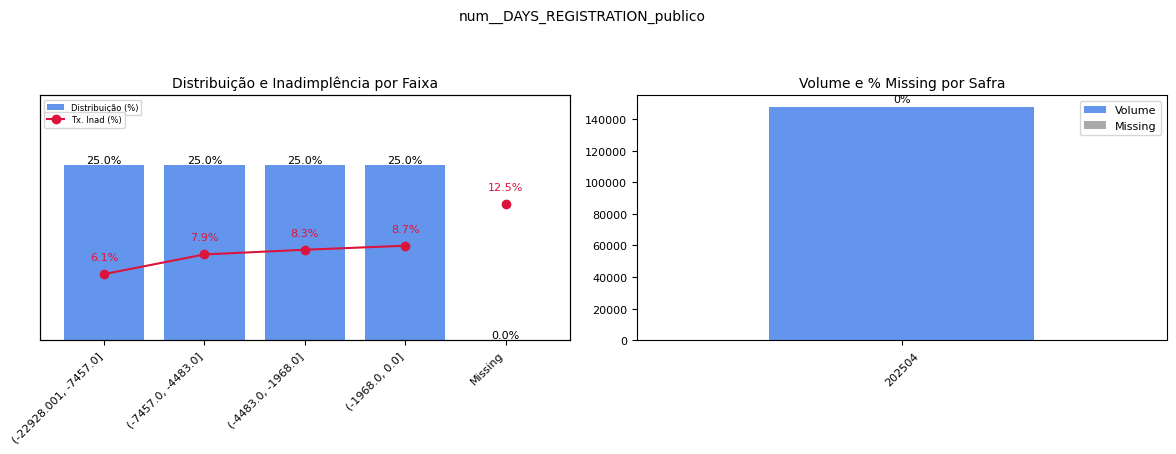


📊 Variável: cat__OCCUPATION_TYPE_publico_Laborers


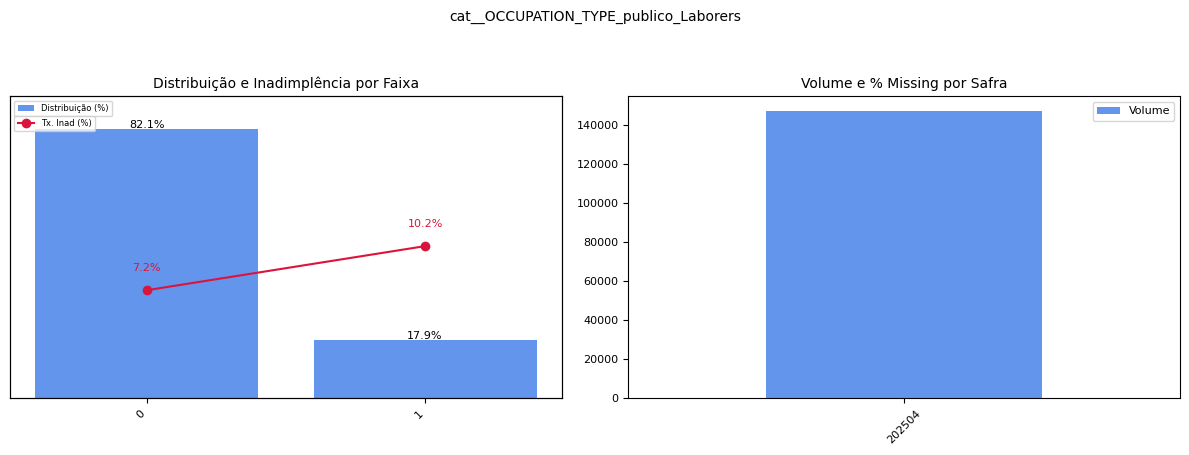


📊 Variável: num__INCOME_TO_BIRTH_RATIO_publico


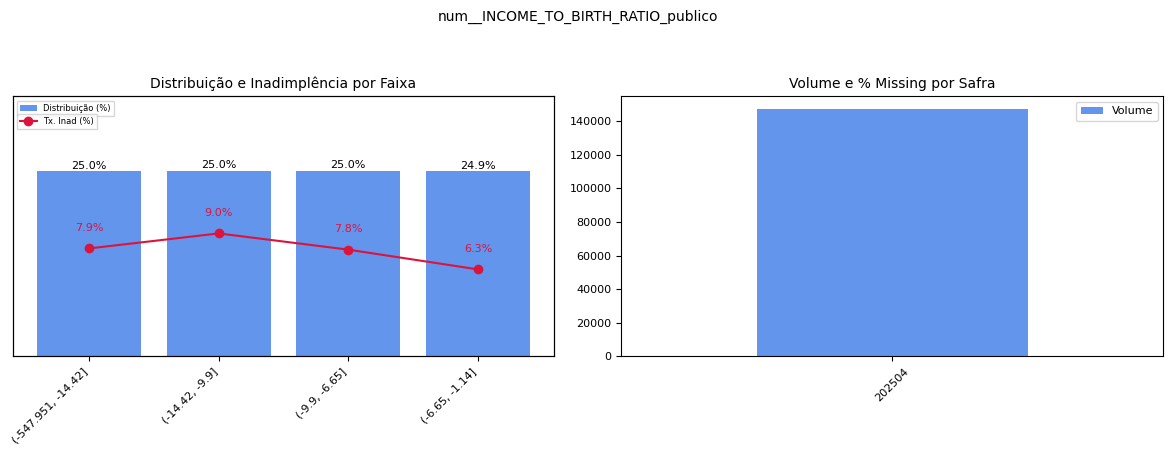


📊 Variável: num__LIVINGAPARTMENTS_MEDI_publico


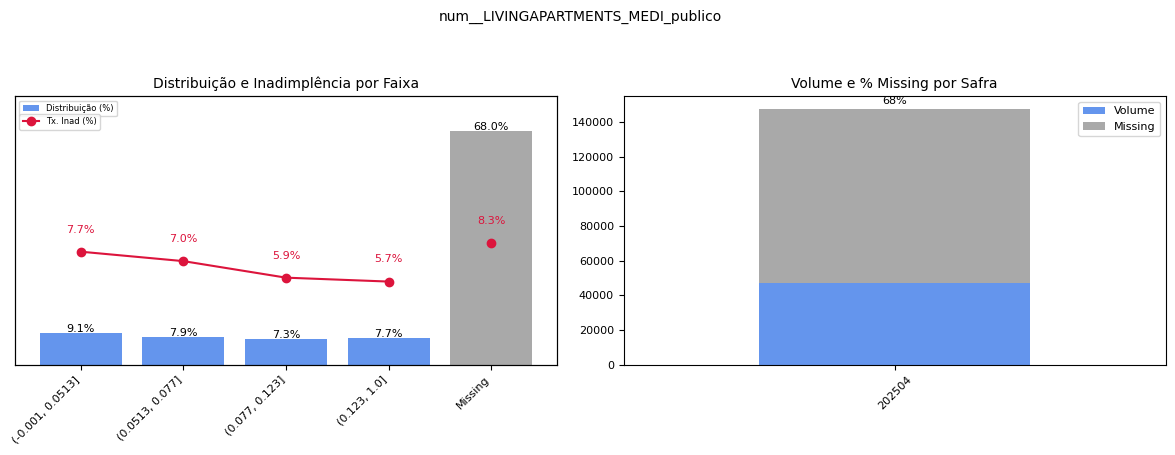


📊 Variável: num__VL_TOT_VL_TOT_AMT_ANNUITY_ULTIMOS_24_MESES_externo


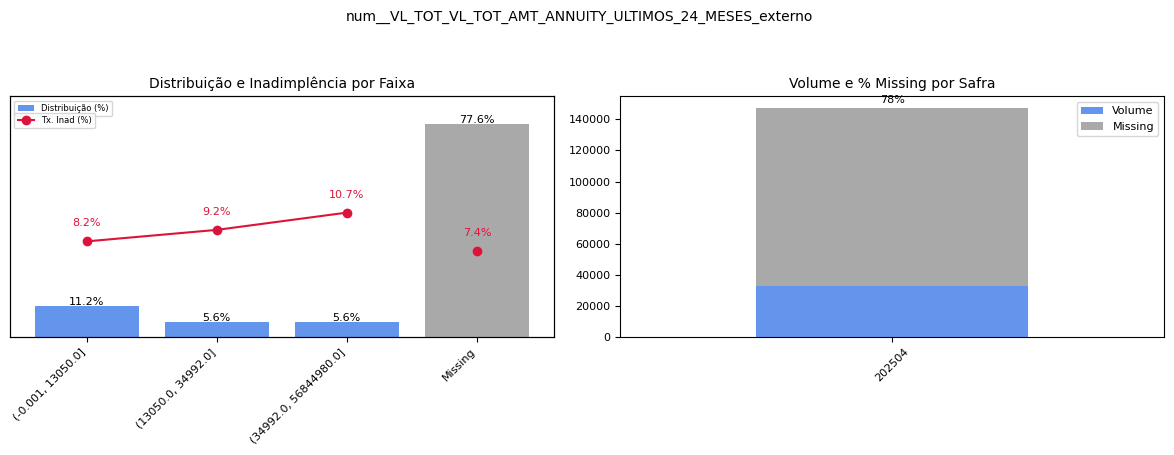


📊 Variável: num__DEF_30_CNT_SOCIAL_CIRCLE_publico


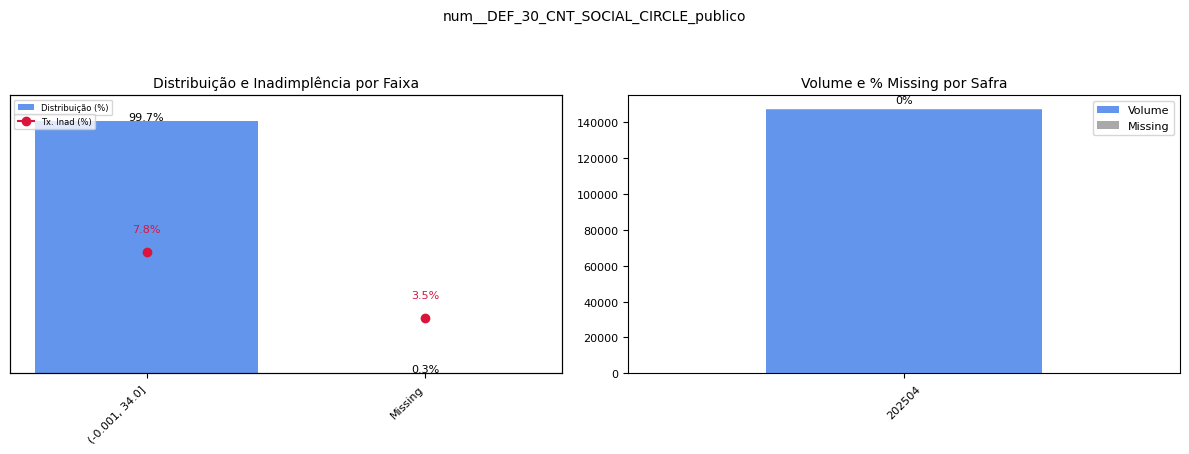


📊 Variável: cat__WALLSMATERIAL_MODE_publico_Panel


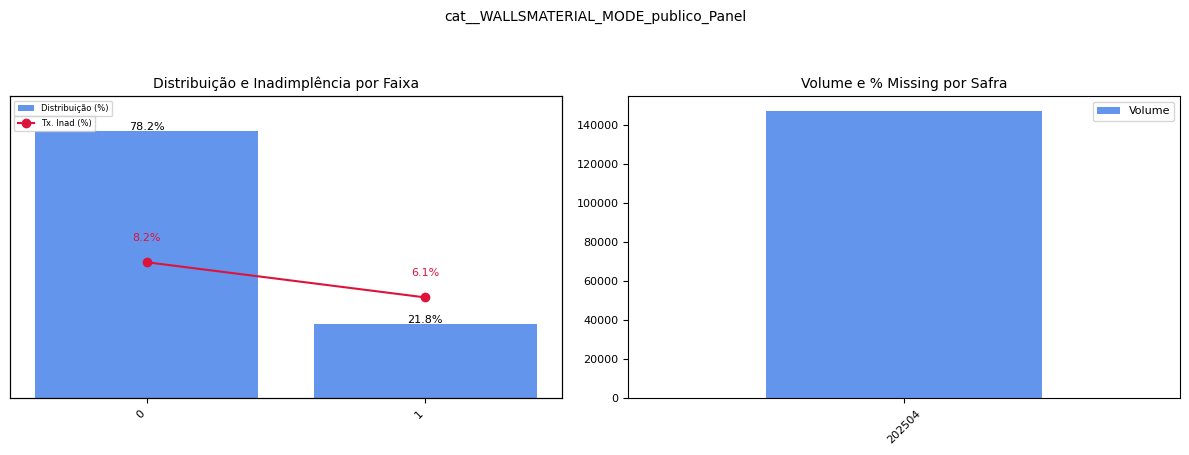


📊 Variável: num__VL_MIN_QTD_STATUS_C_ULTIMOS_36_MESES_externo


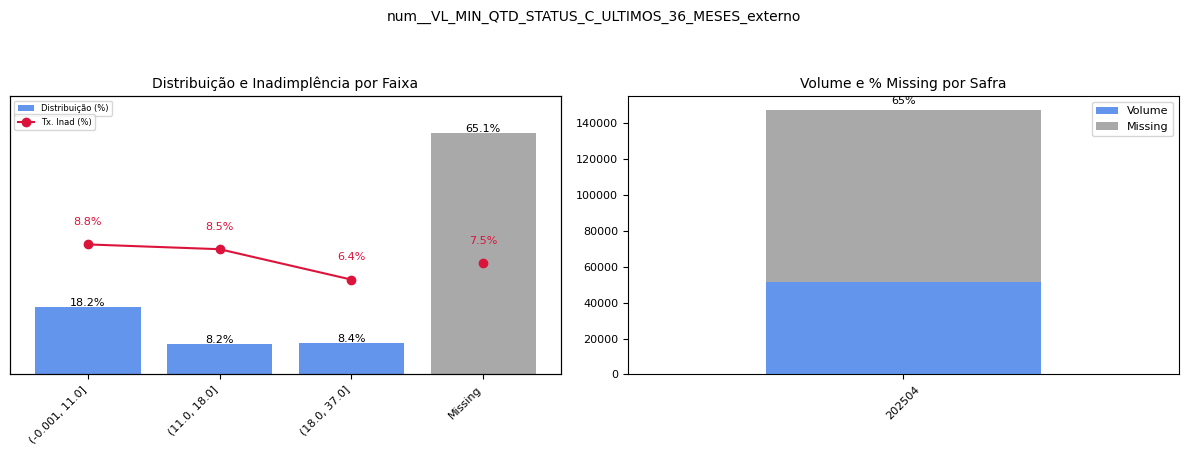


📊 Variável: num__QT_MAX_QT_MAX_CREDIT_DAY_OVERDUE_ULTIMOS_36_MESES_externo


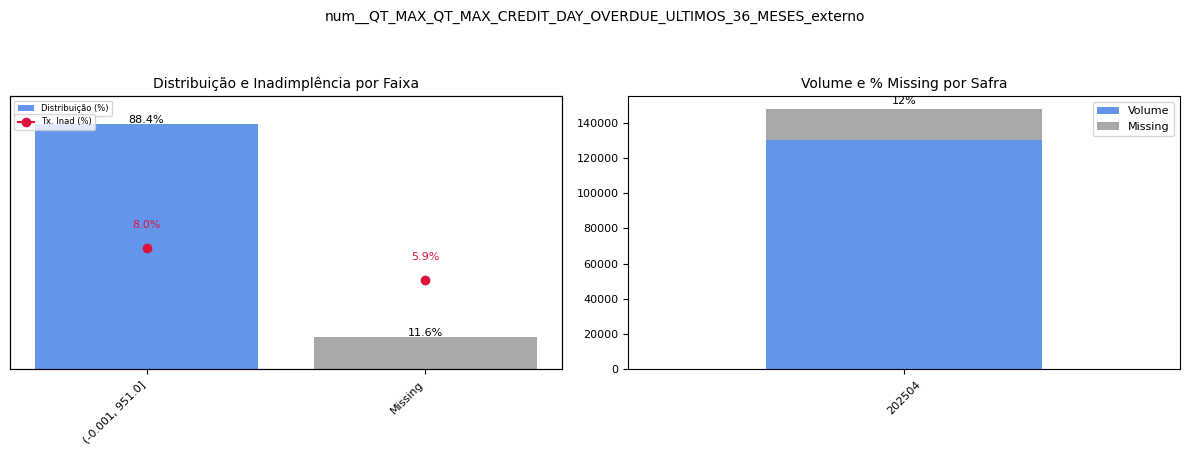


📊 Variável: cat__NAME_CONTRACT_TYPE_publico_Cash_loans


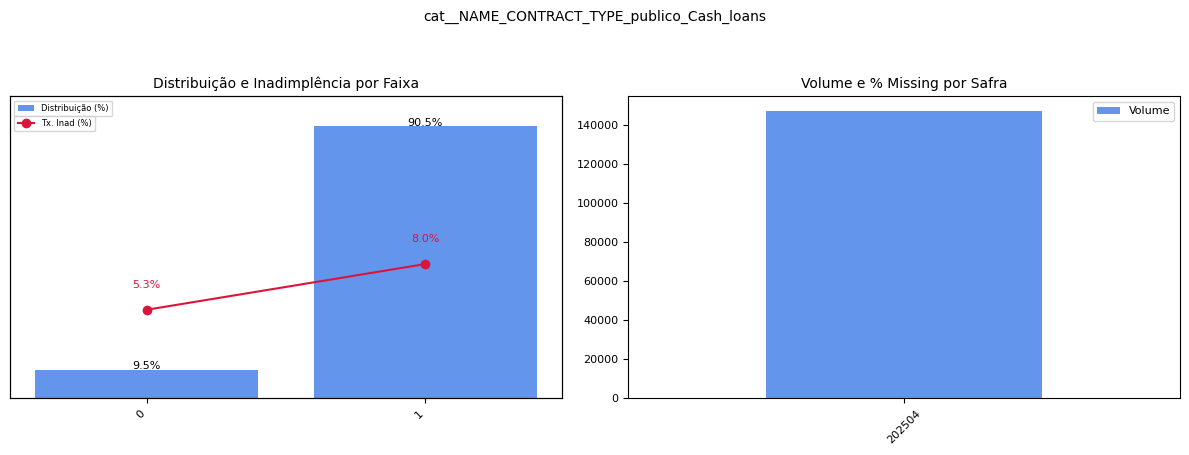


📊 Variável: num__FLAG_DOCUMENT_6_publico


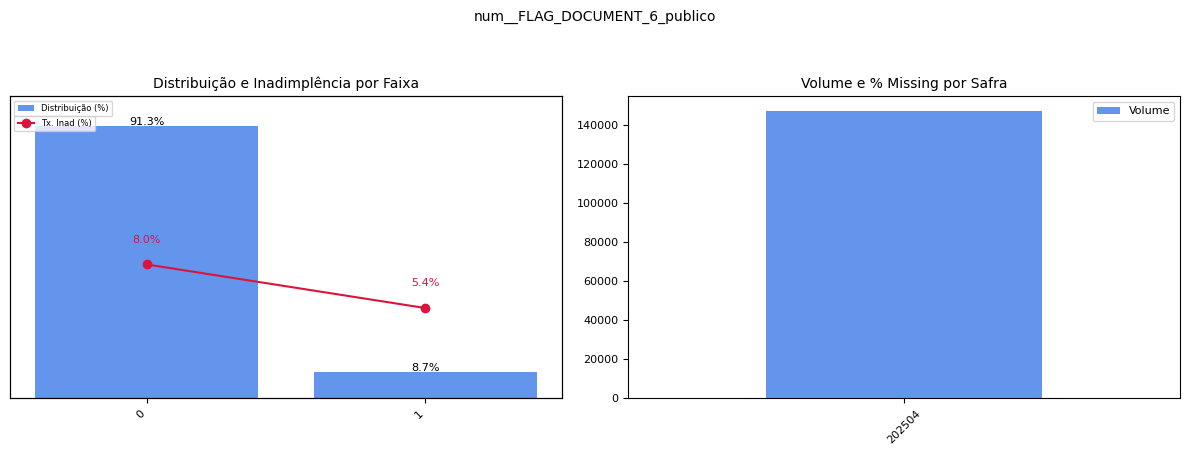


📊 Variável: num__FLAG_WORK_PHONE_publico


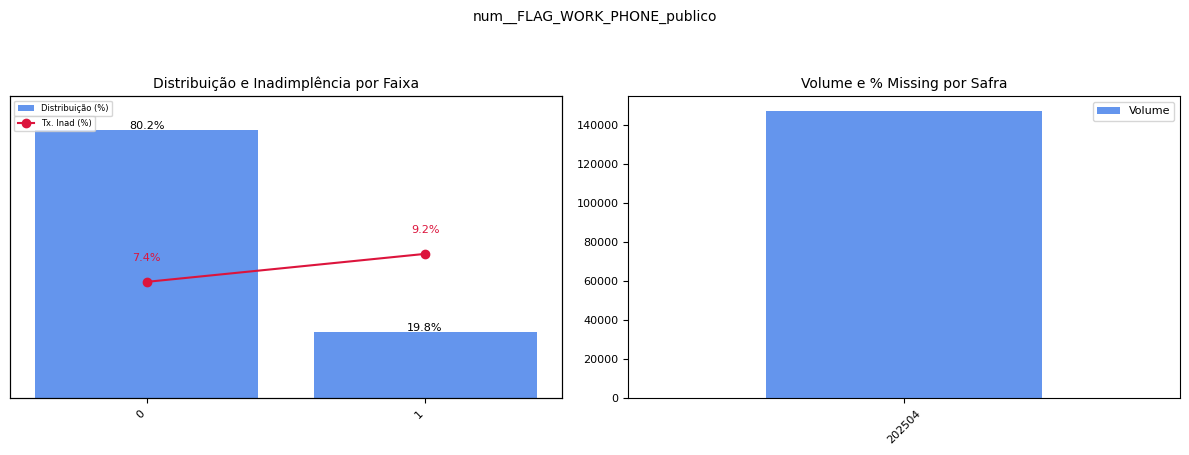

In [ ]:
# Primeira análise

funcs_deriv.graficos_combinados_lista(
    df=df_treino,
    lista_variaveis= lista_vars,
    nome_target='TARGET',
    nome_data='anomes',
    n_faixas=4,
    metodo='quantil'
)


## Variáveis Ok

In [ ]:
lista_vars_ok = [
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo',
 'num__INCOME_TO_EMPLOYED_RATIO_publico',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS_36_MESES_externo',
 'cat__NAME_EDUCATION_TYPE_publico_Higher_education',
 'cat__NAME_INCOME_TYPE_publico_Working',
 'num__TOTALAREA_MODE_publico',
 'num__REGION_POPULATION_RELATIVE_publico',
 'num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo',
 'num__DAYS_ID_PUBLISH_publico',
 'num__REG_CITY_NOT_WORK_CITY_publico',
 'num__FLAG_DOCUMENT_3_publico',
 'num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__DAYS_REGISTRATION_publico',
 'cat__OCCUPATION_TYPE_publico_Laborers',
 'num__LIVINGAPARTMENTS_MEDI_publico',
 'num__VL_TOT_VL_TOT_AMT_ANNUITY_ULTIMOS_24_MESES_externo',
 'cat__WALLSMATERIAL_MODE_publico_Panel',
 'cat__NAME_CONTRACT_TYPE_publico_Cash_loans',
 'num__FLAG_DOCUMENT_6_publico',
 'num__FLAG_WORK_PHONE_publico'
]

len(lista_vars_ok)

25


📊 Variável: num__EXT_SOURCE_3_publico


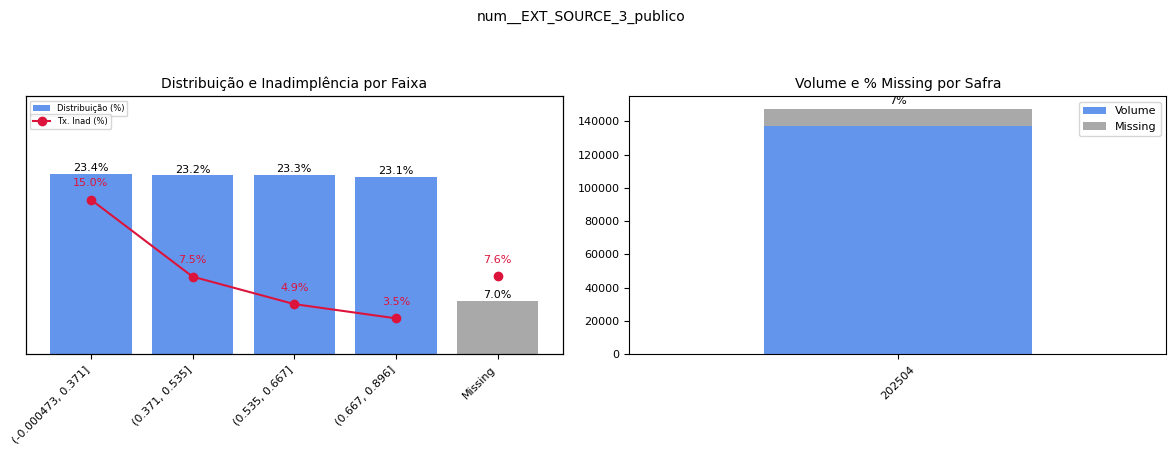


📊 Variável: num__EXT_SOURCE_2_publico


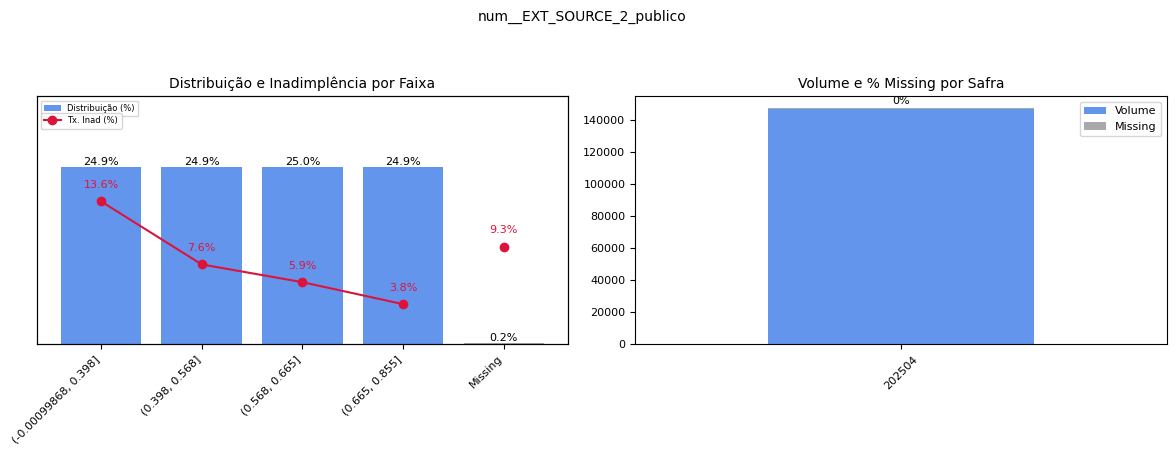


📊 Variável: num__EXT_SOURCE_1_publico


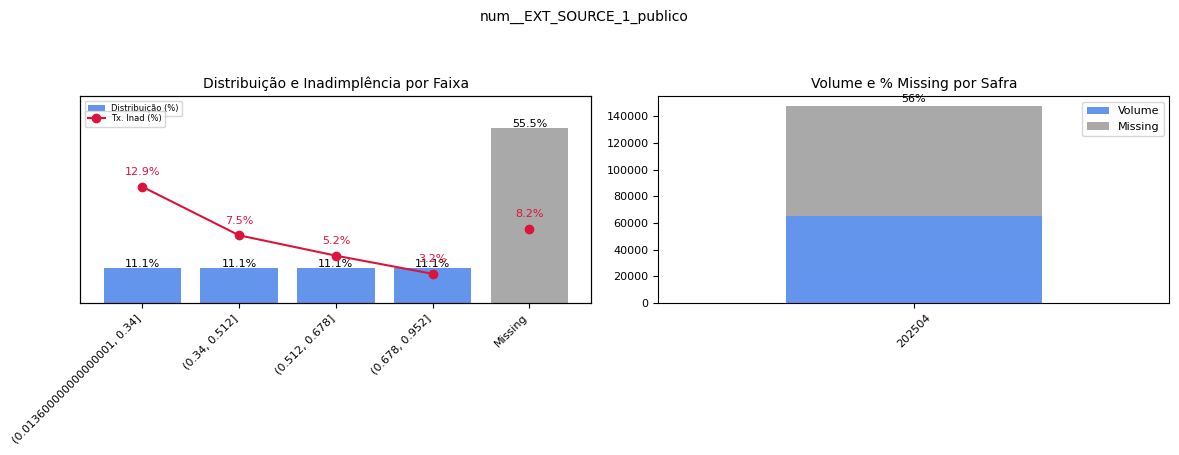


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo


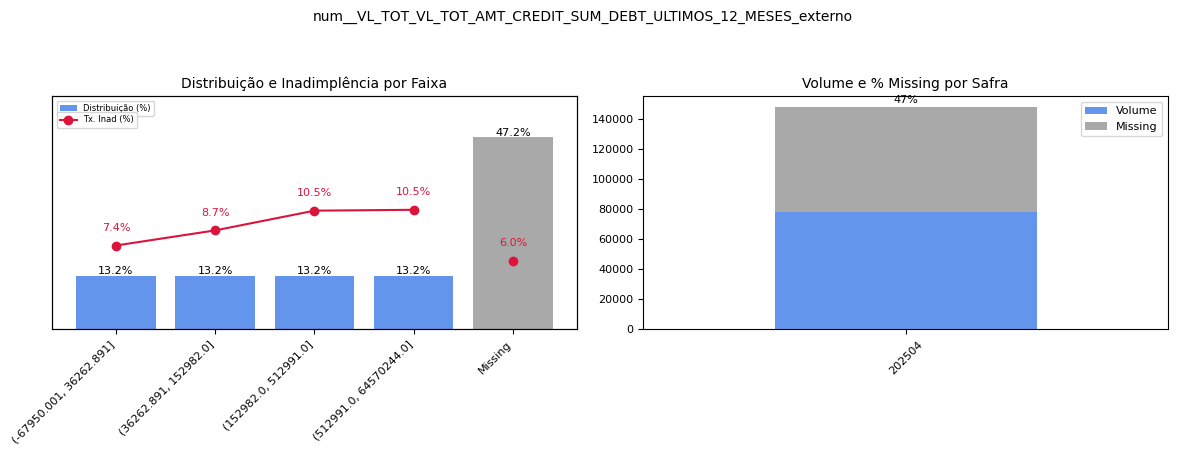


📊 Variável: num__INCOME_TO_EMPLOYED_RATIO_publico


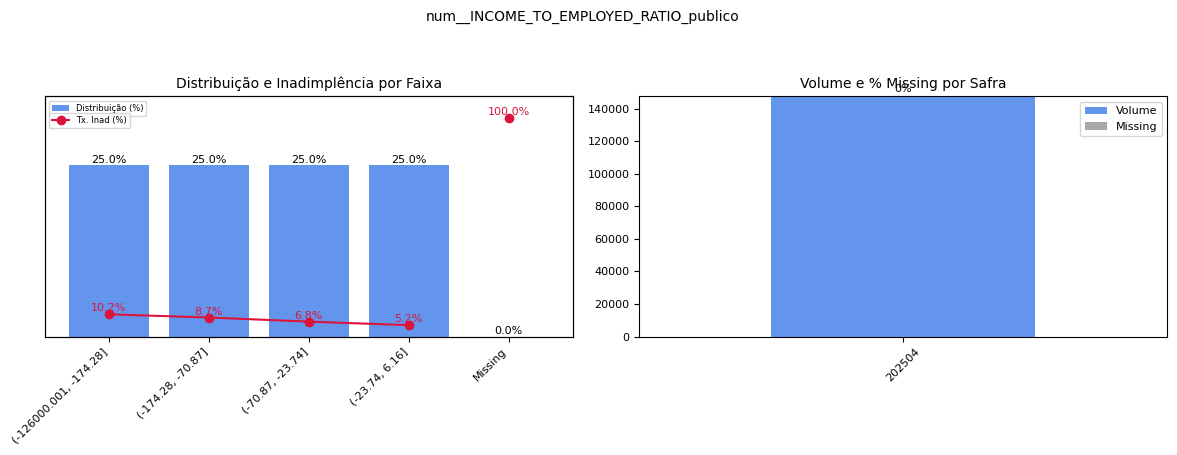


📊 Variável: num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo


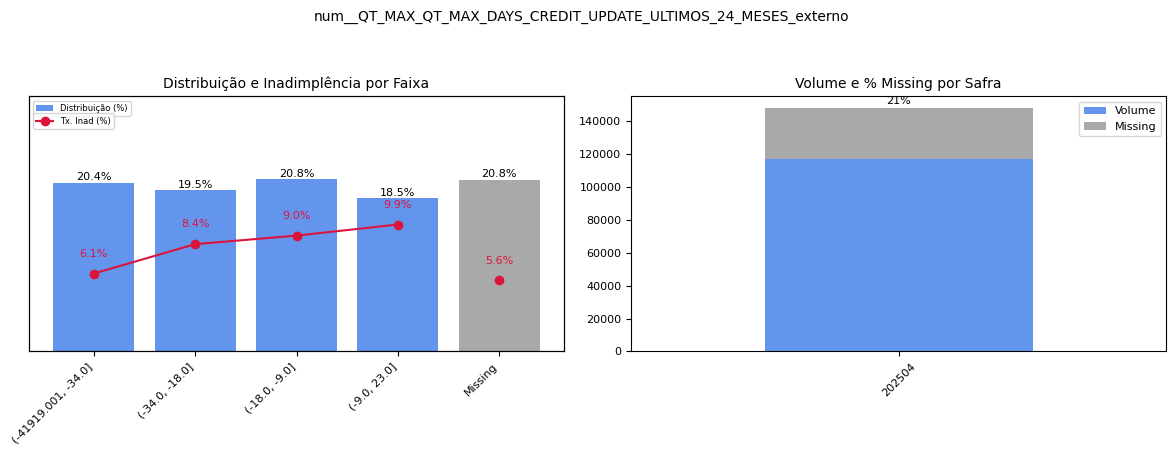


📊 Variável: num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo


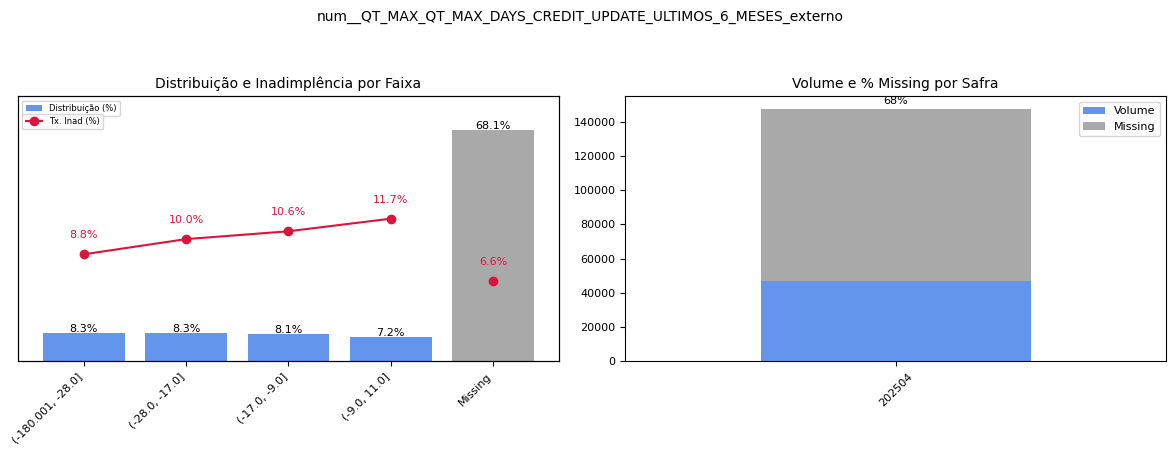


📊 Variável: num__QT_MAX_QT_MAX_DAYS_CREDIT_ENDDATE_ULTIMOS_36_MESES_externo


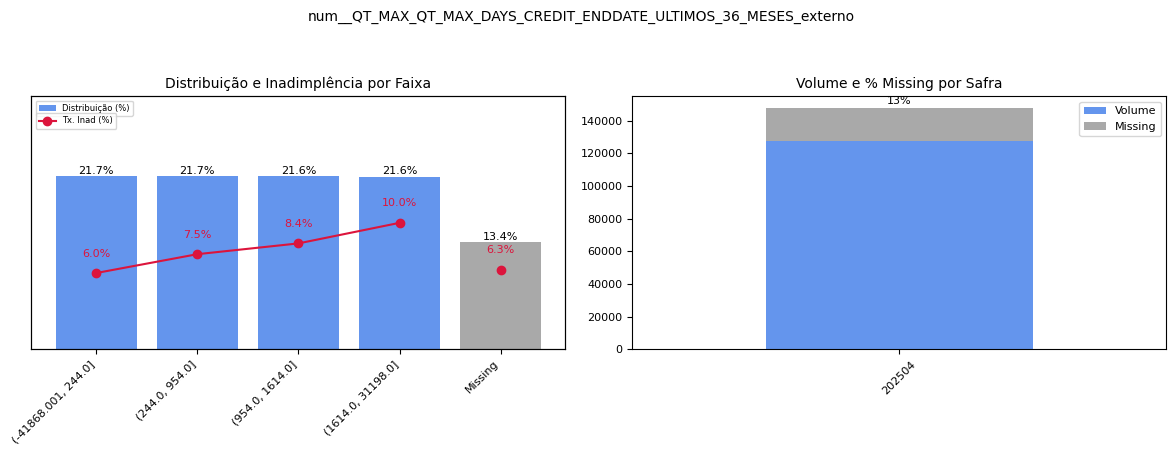


📊 Variável: cat__NAME_EDUCATION_TYPE_publico_Higher_education


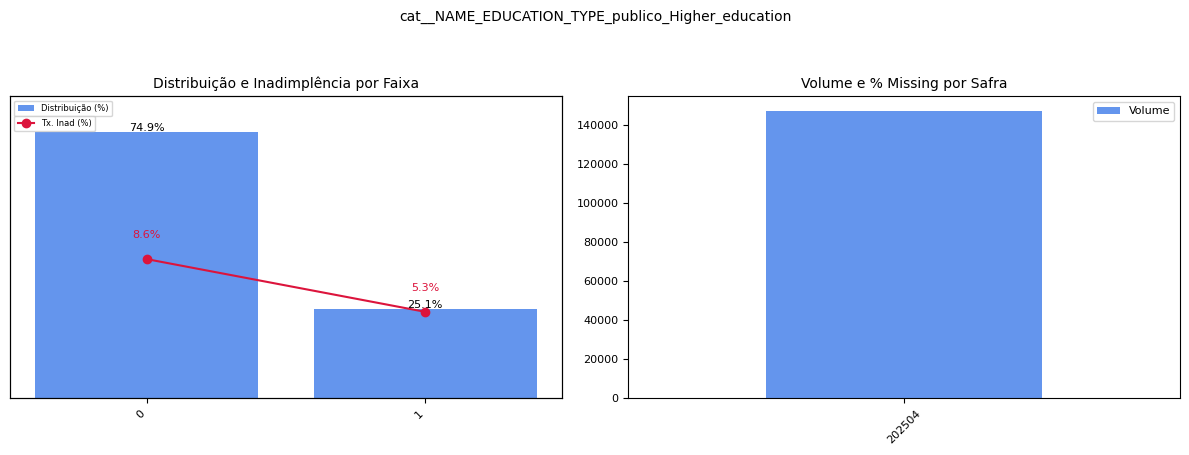


📊 Variável: cat__NAME_INCOME_TYPE_publico_Working


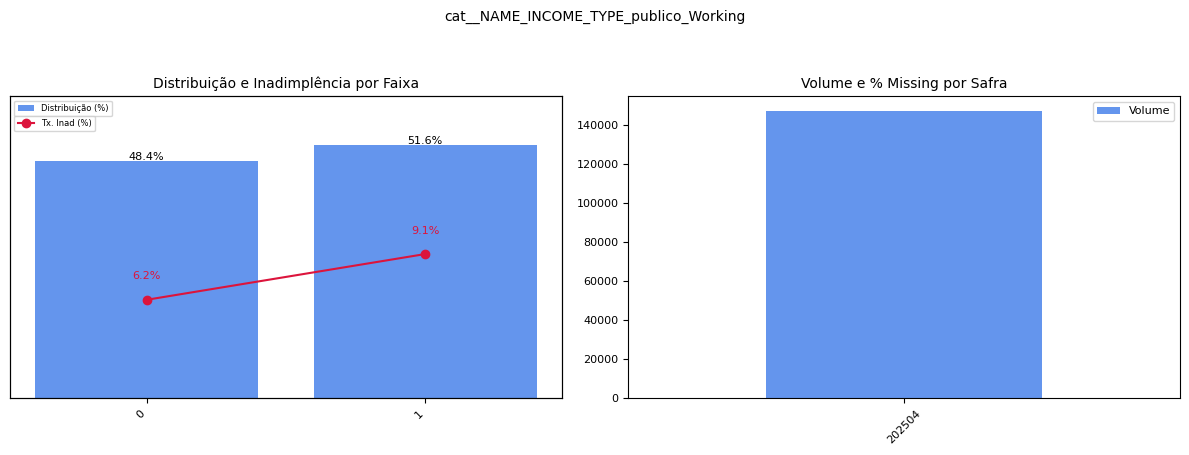


📊 Variável: num__TOTALAREA_MODE_publico


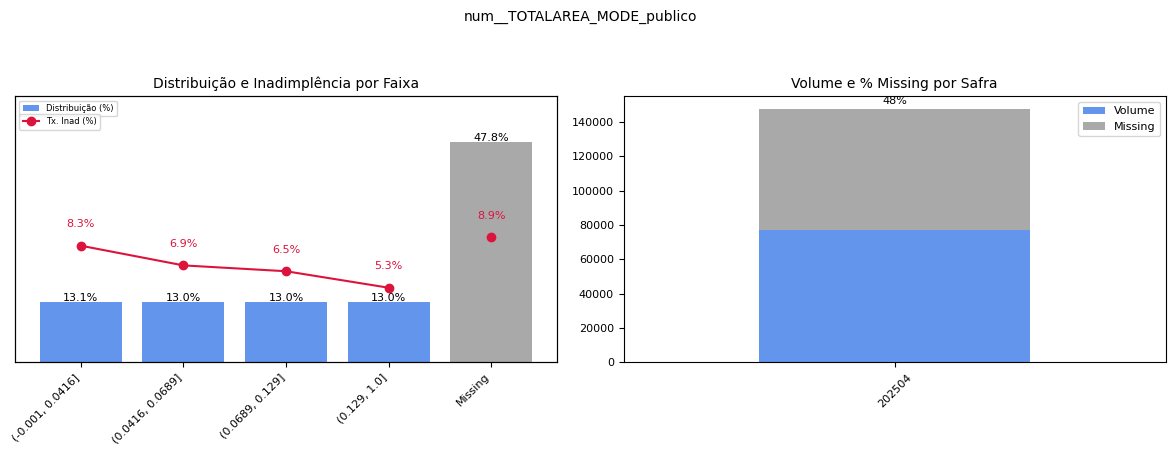


📊 Variável: num__REGION_POPULATION_RELATIVE_publico


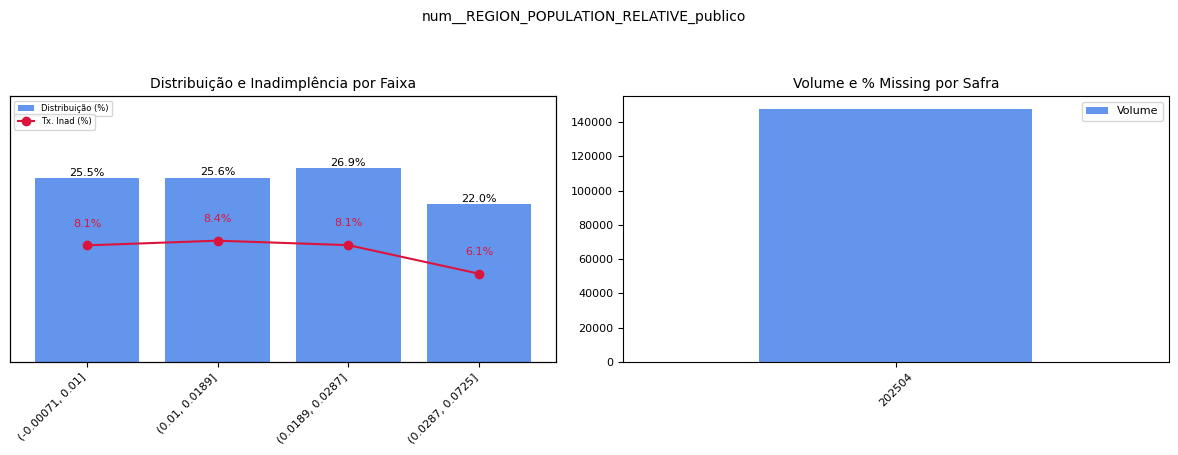


📊 Variável: num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo


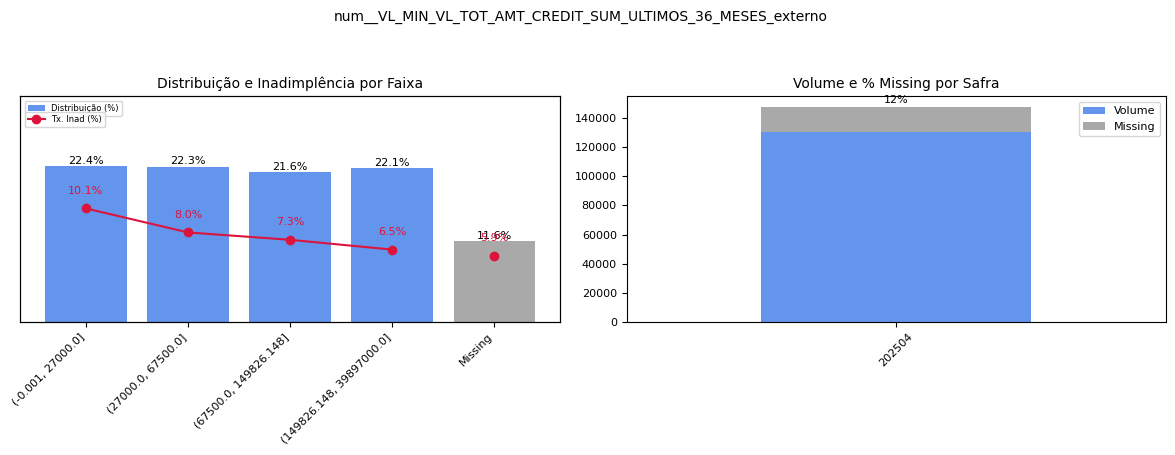


📊 Variável: num__DAYS_ID_PUBLISH_publico


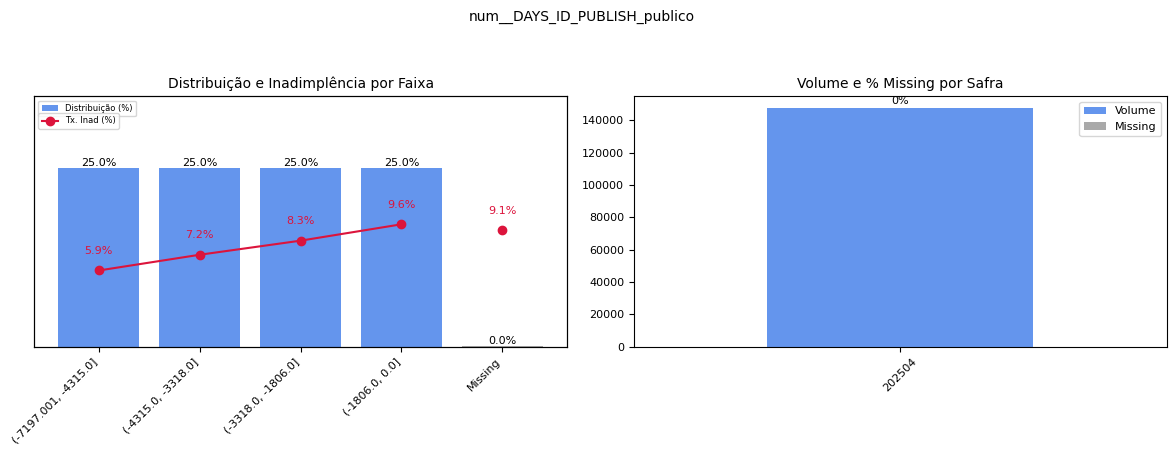


📊 Variável: num__REG_CITY_NOT_WORK_CITY_publico


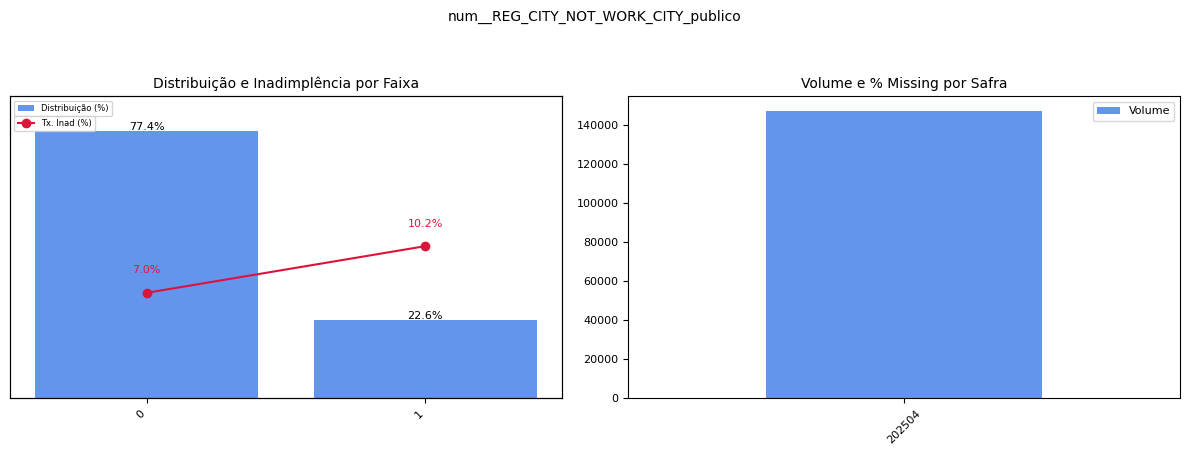


📊 Variável: num__FLAG_DOCUMENT_3_publico


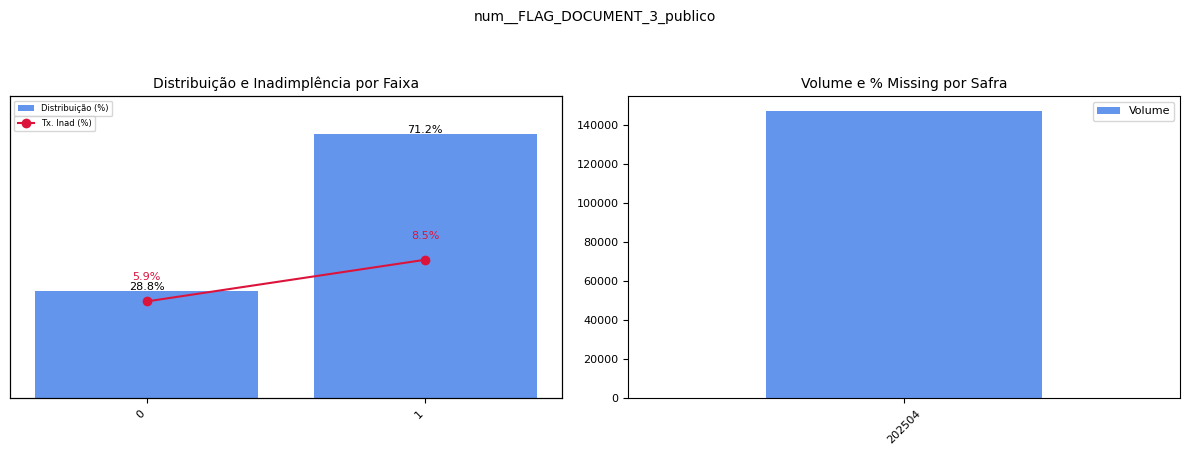


📊 Variável: num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo


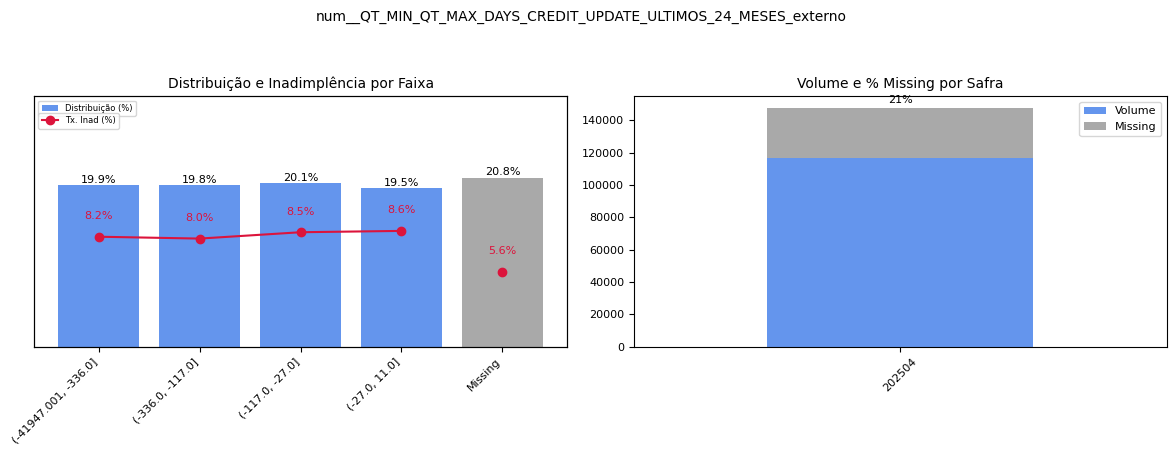


📊 Variável: num__DAYS_REGISTRATION_publico


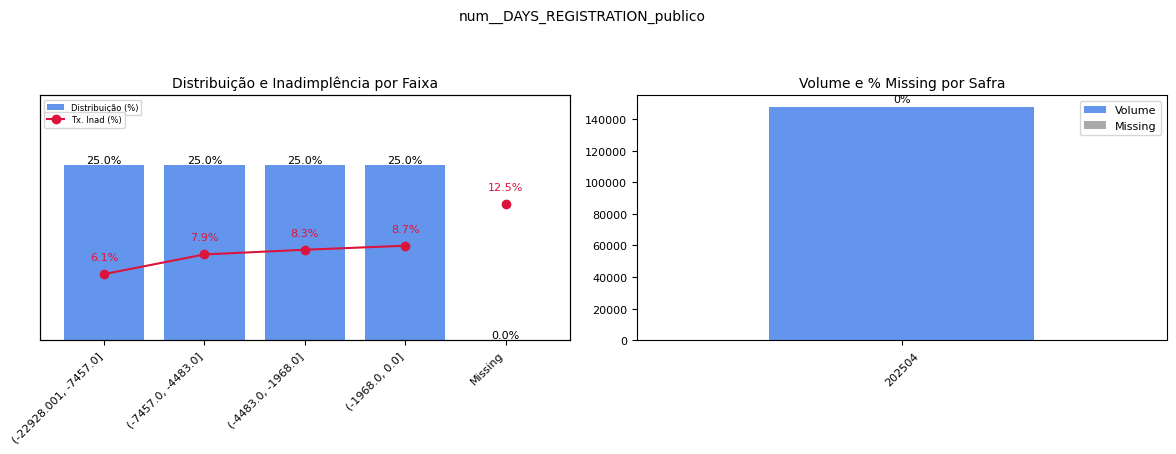


📊 Variável: cat__OCCUPATION_TYPE_publico_Laborers


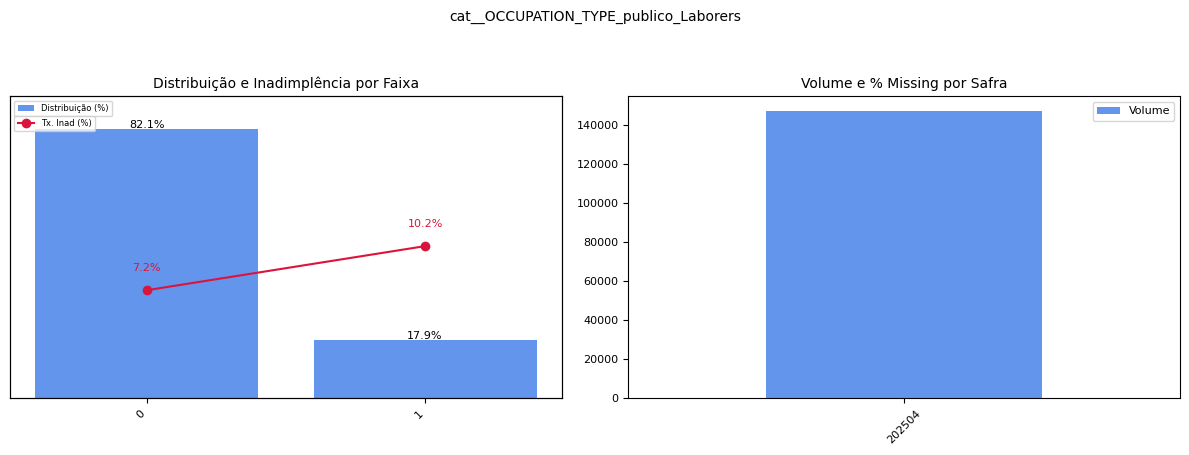


📊 Variável: num__LIVINGAPARTMENTS_MEDI_publico


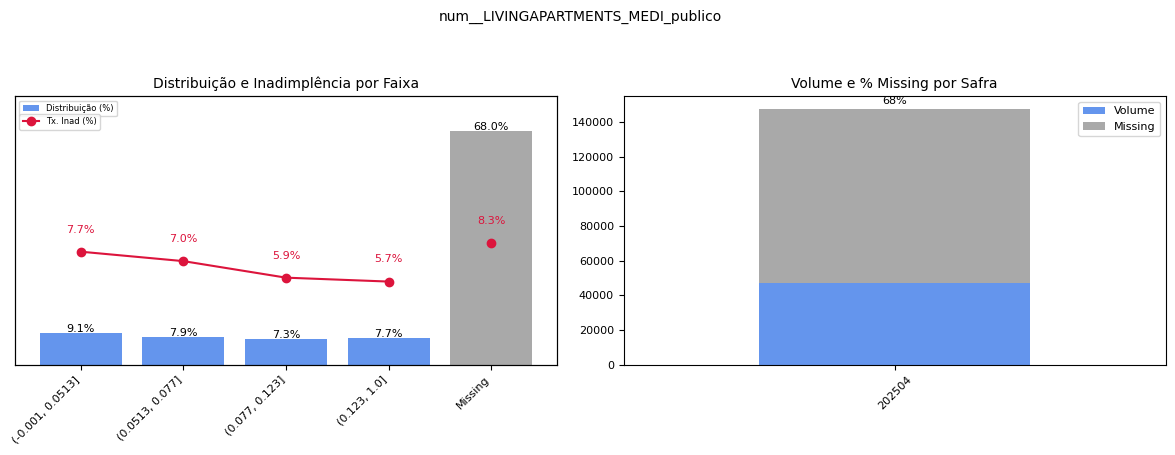


📊 Variável: num__VL_TOT_VL_TOT_AMT_ANNUITY_ULTIMOS_24_MESES_externo


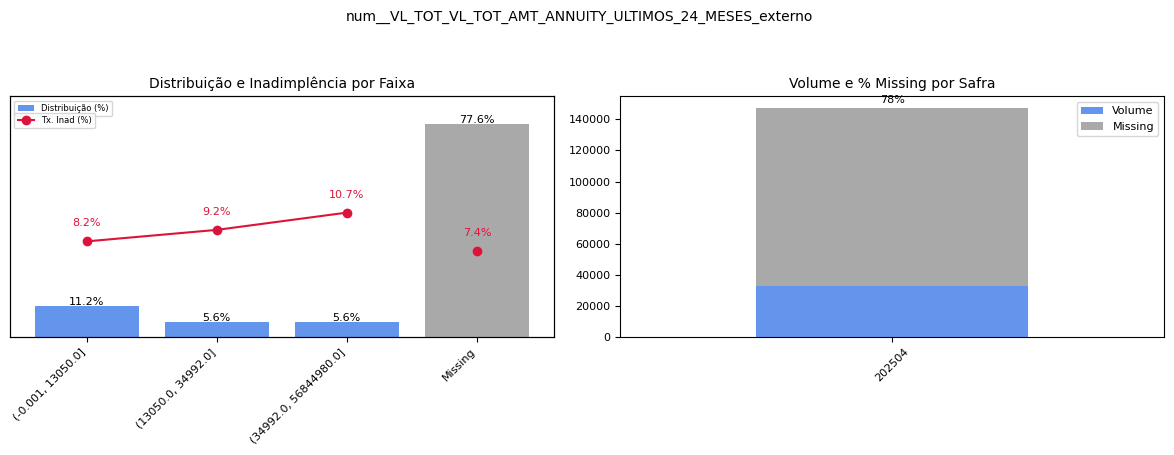


📊 Variável: cat__WALLSMATERIAL_MODE_publico_Panel


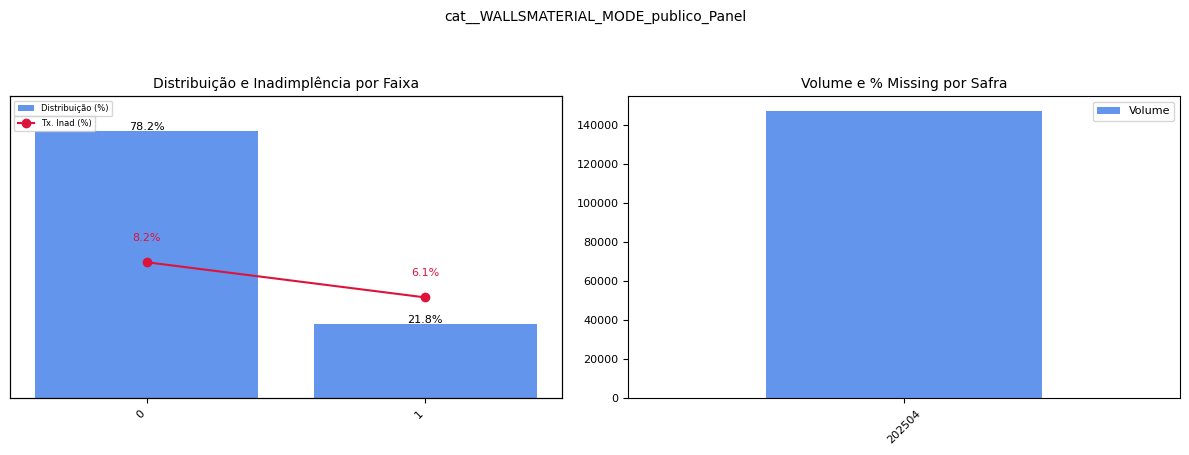


📊 Variável: cat__NAME_CONTRACT_TYPE_publico_Cash_loans


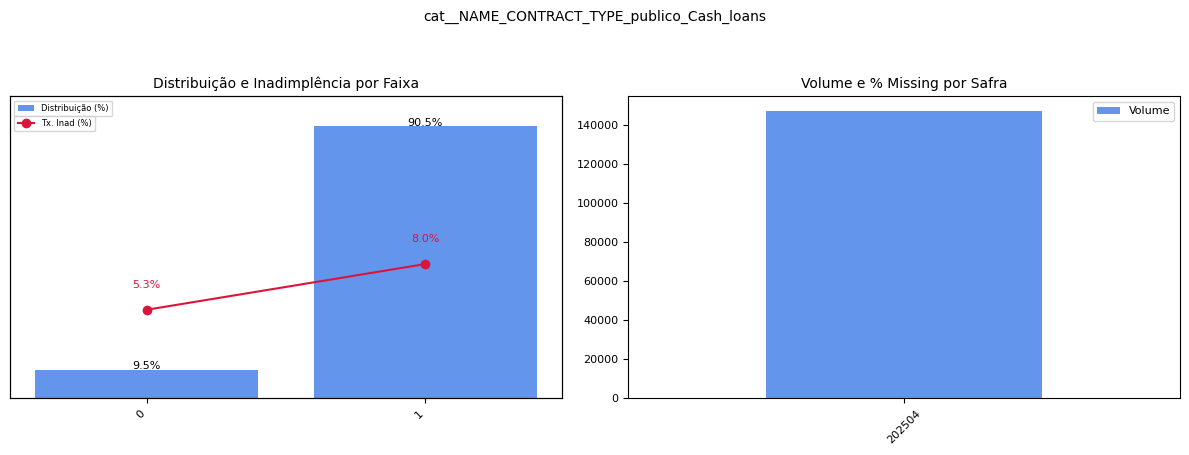


📊 Variável: num__FLAG_DOCUMENT_6_publico


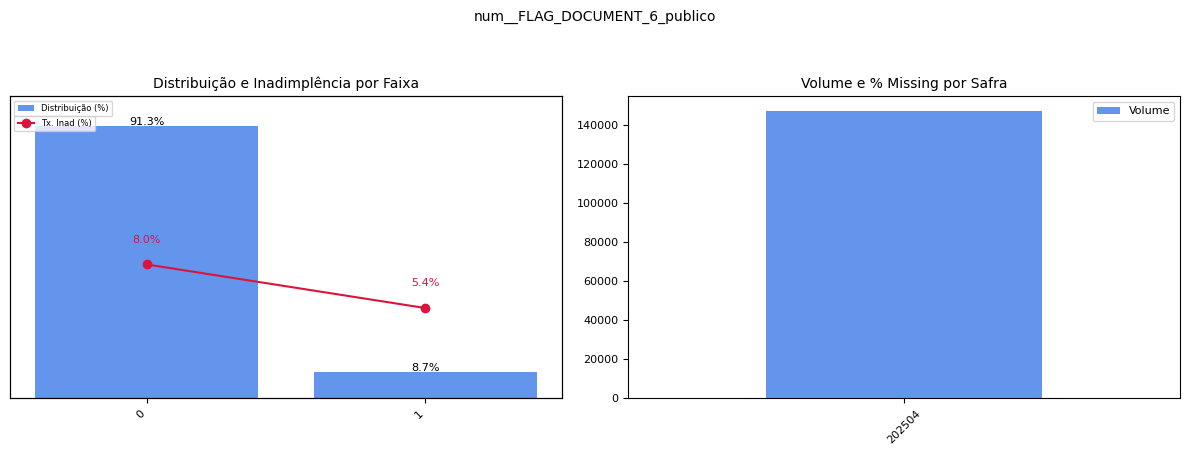


📊 Variável: num__FLAG_WORK_PHONE_publico


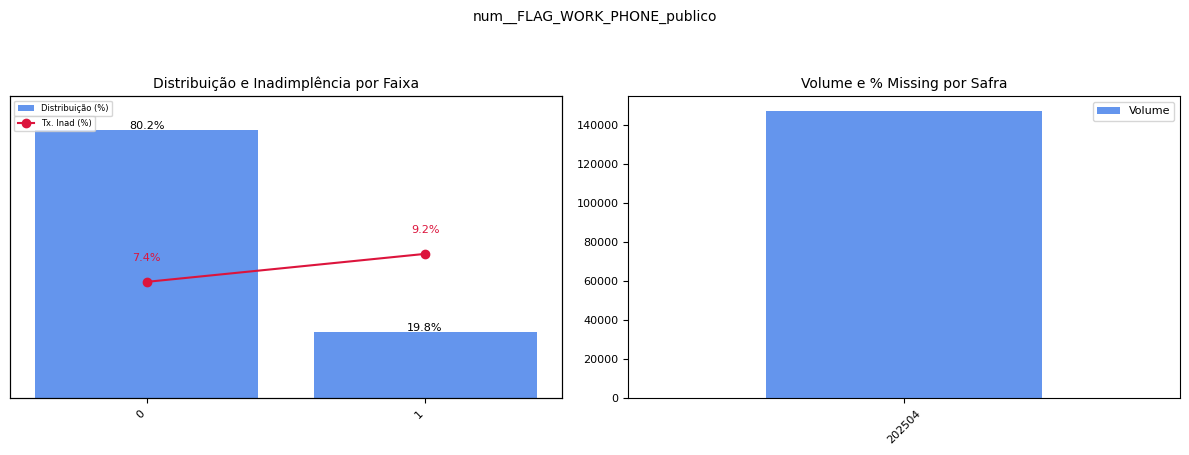

In [ ]:
# Variáveis OK

funcs_deriv.graficos_combinados_lista(
    df=df_treino,
    lista_variaveis= lista_vars_ok,
    nome_target='TARGET',
    nome_data='anomes',
    n_faixas=4,
    metodo='quantil'
)

## Variáveis que precisam de mais quebras

In [ ]:
lista_vars_div = [
 'num__REGION_RATING_CLIENT_W_CITY_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_12_MESES_externo',
 'num__CAR_TO_EMPLOYED_RATIO_publico',
 'num__DEF_30_CNT_SOCIAL_CIRCLE_publico',
 'num__QT_MAX_QT_MAX_CREDIT_DAY_OVERDUE_ULTIMOS_36_MESES_externo'
]


📊 Variável: num__REGION_RATING_CLIENT_W_CITY_publico


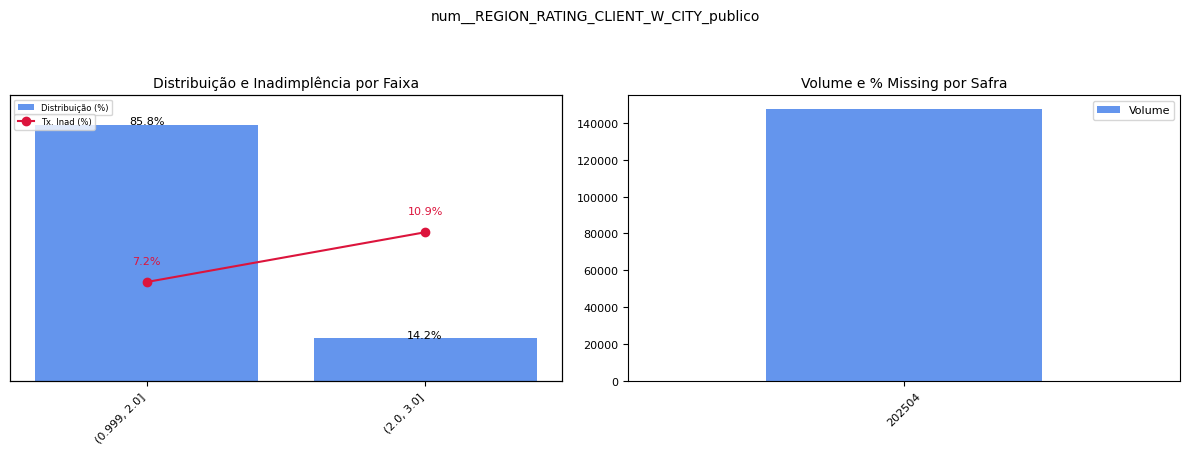


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo


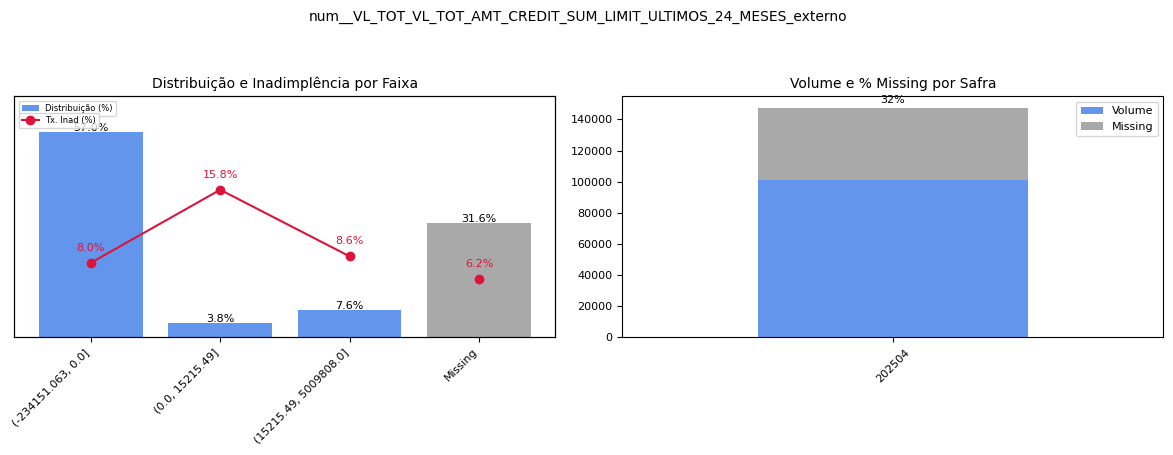


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo


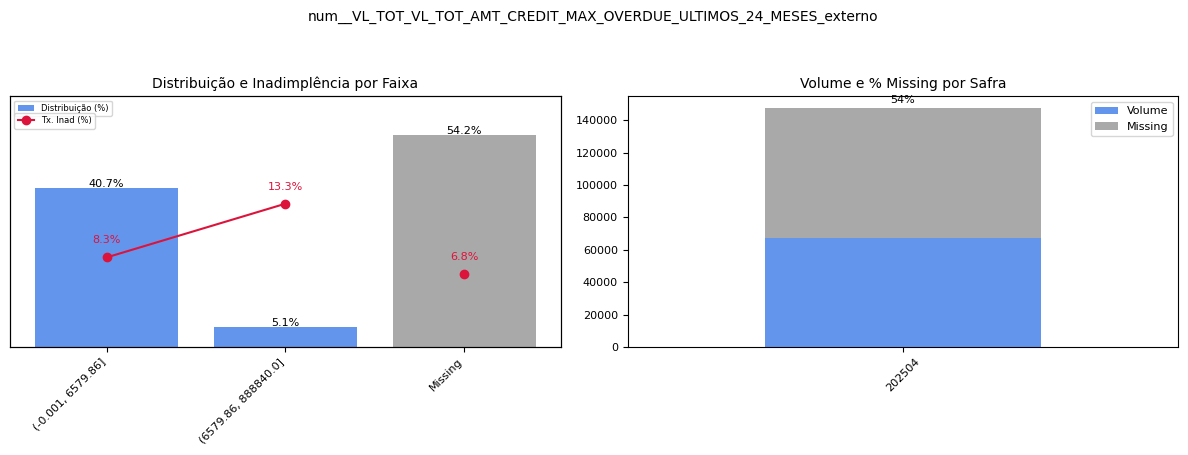


📊 Variável: num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_12_MESES_externo


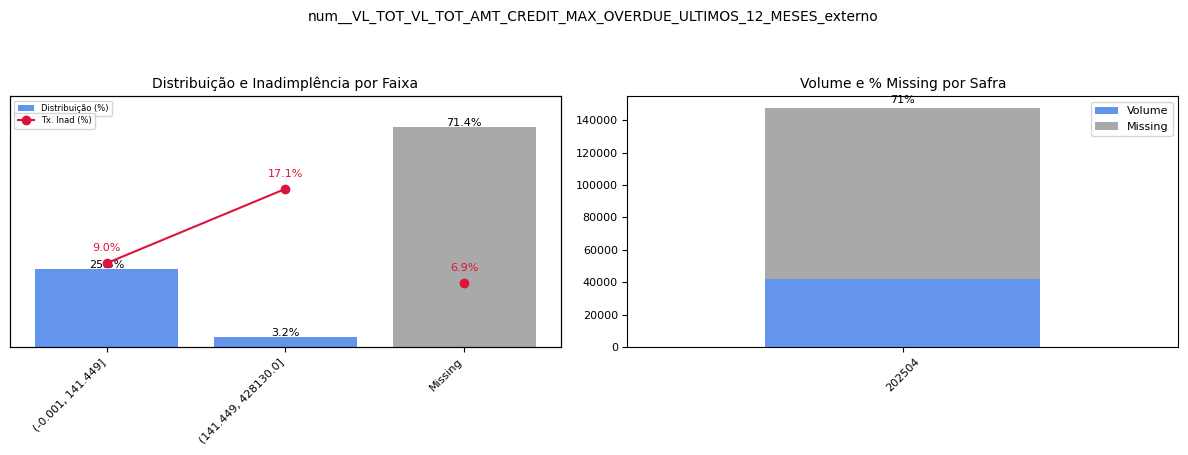


📊 Variável: num__CAR_TO_EMPLOYED_RATIO_publico


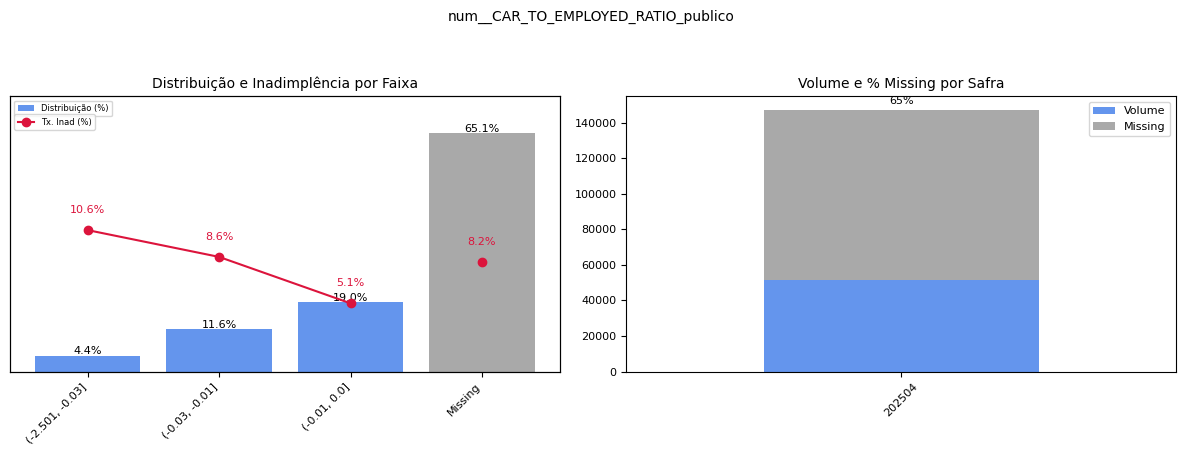


📊 Variável: num__DEF_30_CNT_SOCIAL_CIRCLE_publico


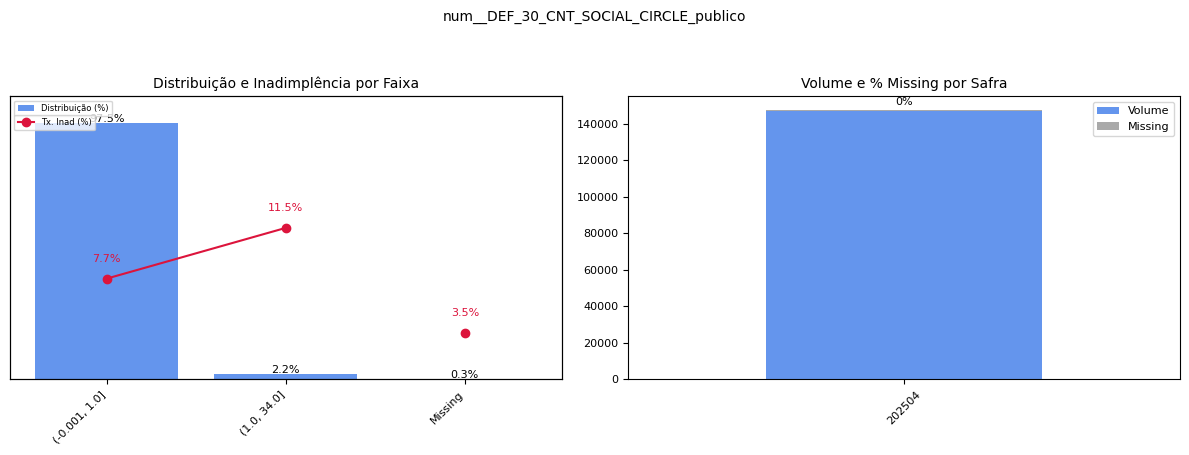


📊 Variável: num__QT_MAX_QT_MAX_CREDIT_DAY_OVERDUE_ULTIMOS_36_MESES_externo


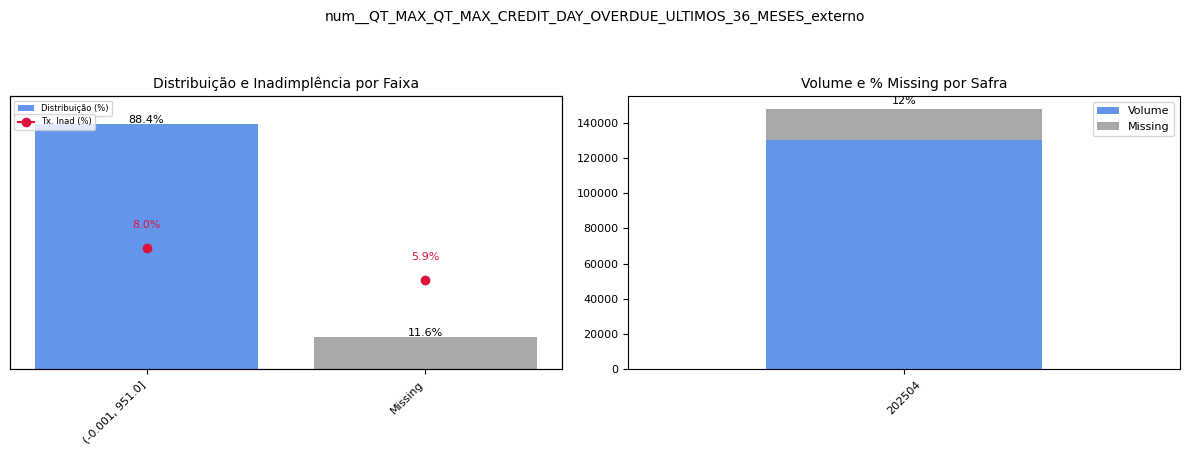

In [ ]:
# Variáveis com mais divisões

funcs_deriv.graficos_combinados_lista(
    df=df_treino,
    lista_variaveis= lista_vars_div,
    nome_target='TARGET',
    nome_data='anomes',
    n_faixas=9,
    metodo='quantil'
)


### Variável: num__REGION_RATING_CLIENT_W_CITY_publico

In [ ]:
var = ['num__REGION_RATING_CLIENT_W_CITY_publico']

In [ ]:
## Calcula a univariada das variáveis já considerando a imputação de missing = -999

univariada_v2 = funcs.univariada_numerica_v2(df_treino,var)
univariada_v2

var  tamanho df  tamanho var  \
0  num__REGION_RATING_CLIENT_W_CITY_publico      147480       147480   

   % missing      mean       std  min  max   P1   P5  P10  P25  P50  P75  P90  \
0        0.0  2.034344  0.499181  1.0  3.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0   

   P95  P99  
0  3.0  3.0

In [ ]:
# Usando o qcut
df_treino['fx_num__REGION_RATING_CLIENT_W_CITY_publico'] = pd.qcut(df_treino['num__REGION_RATING_CLIENT_W_CITY_publico'], q=4, duplicates='drop')

df_treino['fx_num__REGION_RATING_CLIENT_W_CITY_publico'].value_counts()

fx_num__REGION_RATING_CLIENT_W_CITY_publico
(0.999, 2.0]    126486
                 ...  
Name: count, Length: 2, dtype: int64

In [ ]:
# Usano o cut
df_treino['fx_num__REGION_RATING_CLIENT_W_CITY_publico'] = pd.cut(df_treino['num__REGION_RATING_CLIENT_W_CITY_publico'], [1,2,3], include_lowest=True)

df_treino['fx_num__REGION_RATING_CLIENT_W_CITY_publico'].value_counts()

fx_num__REGION_RATING_CLIENT_W_CITY_publico
(0.999, 2.0]    126486
                 ...  
Name: count, Length: 2, dtype: int64

### Variável:  num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo

In [ ]:
var = ['num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo']

In [ ]:
var = ['num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo']

## Calcula a univariada das variáveis já considerando a imputação de missing = -999

univariada_v2 = funcs.univariada_numerica_v2(df_treino,var)
univariada_v2

var  tamanho df  tamanho var  \
0  num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMO...      147480       100842   

   % missing          mean           std          min        max   P1   P5  \
0   0.316233  16449.611205  77349.180068 -234151.0625  5009808.0  0.0  0.0   

   P10  P25  P50  P75      P90           P95           P99  
0  0.0  0.0  0.0  0.0  22500.0  99459.196875  363938.43875

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Usando o qcut
df_treino['fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'] = pd.qcut(df_treino['num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'], q=7, duplicates='drop')

df_treino['fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'].value_counts()

fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo
(-999.0, 0.0]            83969
(-234151.063, -999.0]    46684
(0.0, 5009808.0]         16827
Name: count, dtype: int64

In [ ]:
# Usando o qcut
df_treino['fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'] = pd.cut(df_treino['num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'],[-np.inf, -999.99, -999, 0, np.inf], include_lowest=True)

df_treino['fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'].value_counts()

fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo
(-999.0, 0.0]        83969
(-999.99, -999.0]    46638
(0.0, inf]           16827
(-inf, -999.99]         46
Name: count, dtype: int64

In [ ]:
df_treino['fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'].dtype

CategoricalDtype(categories=[(-inf, -999.99], (-999.99, -999.0], (-999.0, 0.0],
                  (0.0, inf]],
, ordered=True, categories_dtype=interval[float64, right])


📊 Variável categórica: fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo


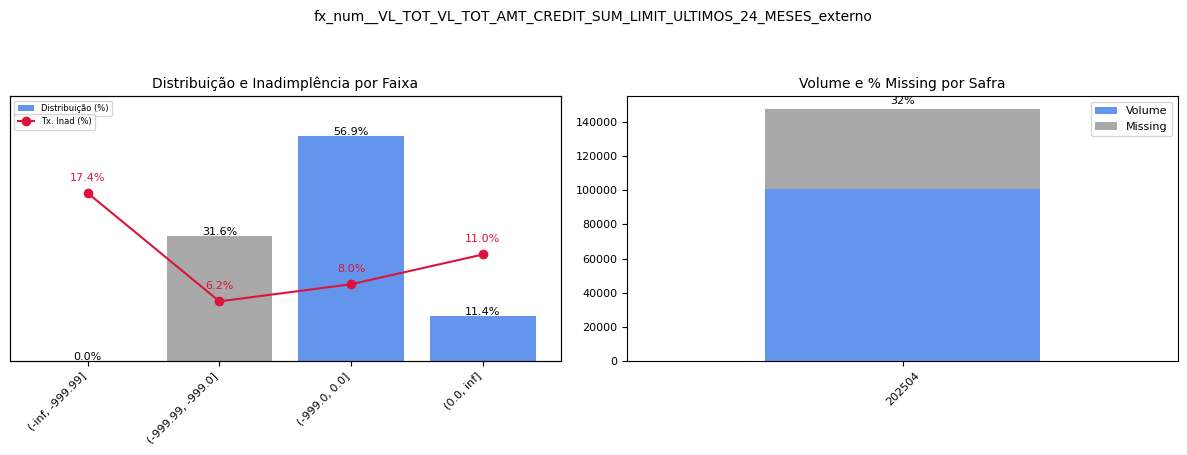

In [ ]:
funcs_deriv.graficos_combinados_categorica(
    df=df_treino,
    lista_variaveis=[
        'fx_num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo'
    ],
    nome_target='TARGET',
    nome_data='anomes'
)


### Variável: num__PAYMENT_RATE_publico

In [ ]:
var = ['num__PAYMENT_RATE_publico']

## Calcula a univariada das variáveis já considerando a imputação de missing = -999

univariada_v2 = funcs.univariada_numerica_v2(df_treino,var)
univariada_v2

var  tamanho df  tamanho var  % missing      mean  \
0  num__PAYMENT_RATE_publico      147480       147473   0.000047  0.053322   

        std   min   max    P1    P5   P10   P25   P50   P75   P90  P95   P99  
0  0.022565  0.02  0.12  0.03  0.03  0.03  0.04  0.05  0.06  0.09  0.1  0.11

#### VOU USAR ESSE CORTE EM 3 FAIXAS

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Usando o qcut
df_treino['fx_num__PAYMENT_RATE_publico'] = pd.qcut(df_treino['num__PAYMENT_RATE_publico'], q=3, duplicates='drop')

df_treino['fx_num__PAYMENT_RATE_publico'].value_counts()

fx_num__PAYMENT_RATE_publico
(-999.001, 0.04]    60224
(0.05, 0.12]        44997
(0.04, 0.05]        42259
Name: count, dtype: int64


📊 Variável categórica: fx_num__PAYMENT_RATE_publico


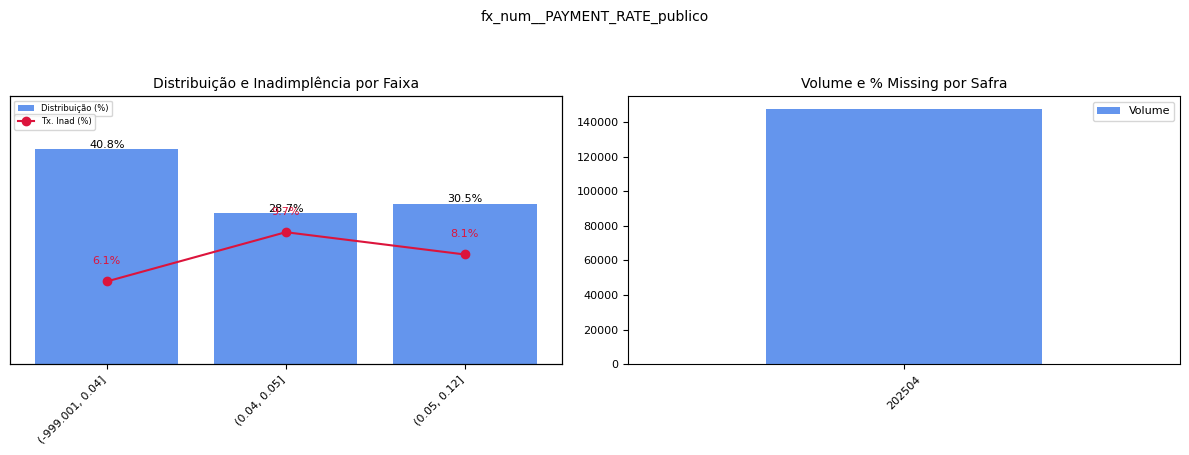

In [ ]:
## VOU USAR ESSE CORTE EM 3 FAIXAS

graficos_combinados_categorica(
    df=df_treino,
    lista_variaveis=[
        'fx_num__PAYMENT_RATE_publico'
    ],
    nome_target='TARGET',
    nome_data='anomes'
)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Usando o qcut
# Usando o qcut
df_treino['fx_num__PAYMENT_RATE_publico'] = pd.cut(df_treino['num__PAYMENT_RATE_publico'],[-999.001, 0.03989, 0.050, 0.055, 0.12], include_lowest=True)

df_treino['fx_num__PAYMENT_RATE_publico'].value_counts()

fx_num__PAYMENT_RATE_publico
(0.055, 0.12]         44997
(0.05, 0.055]         42259
(-999.002, 0.0399]    33211
(0.0399, 0.05]        27013
Name: count, dtype: int64


📊 Variável categórica: fx_num__PAYMENT_RATE_publico


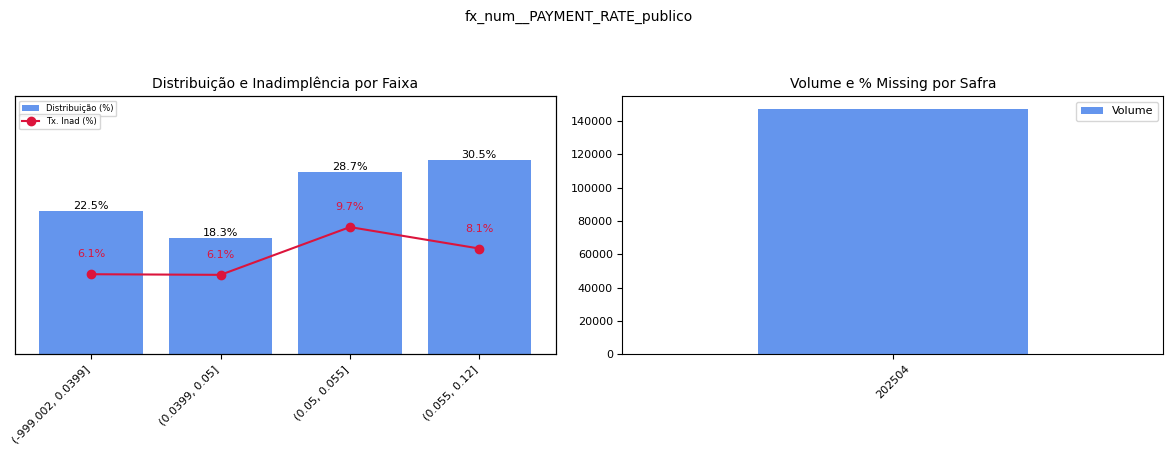

In [ ]:
graficos_combinados_categorica(
    df=df_treino,
    lista_variaveis=[
        'fx_num__PAYMENT_RATE_publico'
    ],
    nome_target='TARGET',
    nome_data='anomes'
)


In [ ]:
pd.crosstab(df_treino['fx_num__PAYMENT_RATE_publico'], df_treino['TARGET'], margins=True)

TARGET                             0      1     All
fx_num__PAYMENT_RATE_publico                       
(-999.002, 0.0399]             31179   2032   33211
(0.0399, 0.05]                 25373   1640   27013
(0.05, 0.055]                  38148   4111   42259
(0.055, 0.12]                  41359   3638   44997
All                           136059  11421  147480

In [ ]:
# Sugestão baseada em análise de percentis e comportamento da inadimplência:
bins = [-np.inf, 0.0399, 0.05, 0.055, np.inf]
labels = ['<=0.0399', '0.04-0.05', '0.051-0.055', '>0.055']

df_treino['fx_num__PAYMENT_RATE_publico'] = pd.cut(df_treino['num__PAYMENT_RATE_publico'], bins=bins, labels=labels)
df_treino['fx_num__PAYMENT_RATE_publico'].value_counts()

fx_num__PAYMENT_RATE_publico
>0.055         44997
0.051-0.055    42259
<=0.0399       33211
0.04-0.05      27013
Name: count, dtype: int64


📊 Variável categórica: fx_num__PAYMENT_RATE_publico


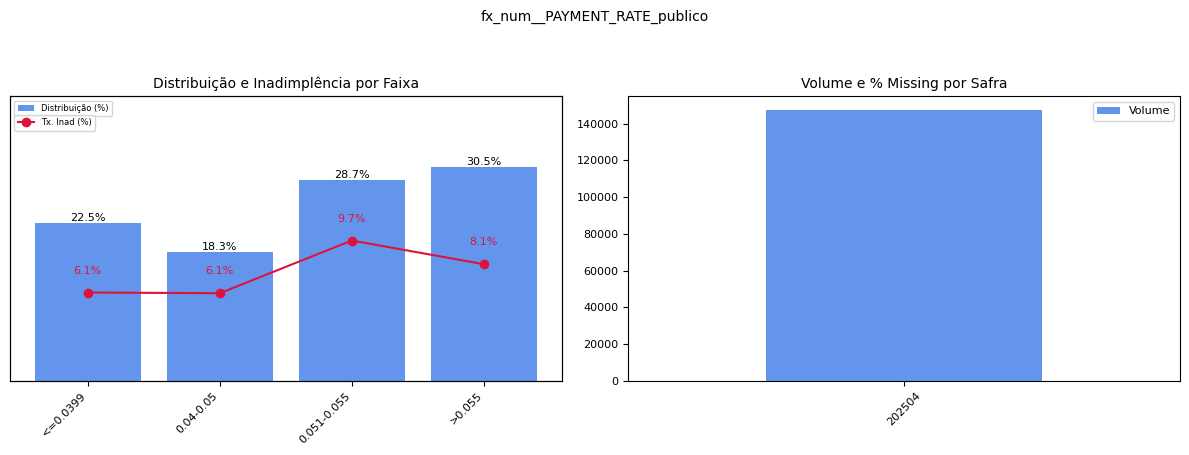

In [ ]:
graficos_combinados_categorica(
    df=df_treino,
    lista_variaveis=[
        'fx_num__PAYMENT_RATE_publico'
    ],
    nome_target='TARGET',
    nome_data='anomes'
)


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_treino['fx_payment_rate_bin'] = kbd.fit_transform(df_treino[['num__PAYMENT_RATE_publico']])
df_treino['fx_payment_rate_bin'].value_counts()

fx_payment_rate_bin
3.0    44997
2.0    42259
0.0    33211
1.0    27013
Name: count, dtype: int64

### Variável: AMT_INCOME_TOTAL_publico

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Usando o qcut
df_treino['fx_num__AMT_GOODS_PRICE_publico'] = pd.qcut(df_treino['num__AMT_GOODS_PRICE_publico'], q=4, duplicates='drop')

df_treino['fx_num__AMT_GOODS_PRICE_publico'].value_counts()

fx_num__AMT_GOODS_PRICE_publico
(-999.001, 238500.0]     37391
(238500.0, 450000.0]     37203
(450000.0, 688500.0]     36878
(688500.0, 4050000.0]    36008
Name: count, dtype: int64